In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

### Reading Data

In [2]:
df = pd.read_excel("MX Nizanda weather station data 2006-2024.xlsx",sheet_name='Base de datos')

In [3]:
df

,Segment,Source,Day,Month,Year,Hour,Minute,Barometer - mm Hg,Temp - °C,High Temp - °C,...,InHeat,InEMC,In AirDensity,WindSamp,WindTx,ISSRecept,Arc.Int.,SolarRad,SolarEnergy,HiSolarRad
0,1.0,Nizanda 1,5.0,2.0,2006.0,19.0,0.0,769.0,24.3,24.3,...,NaN,NaN,NaN,37.0,1.0,5.4,30.0,0.0,0.00,0.0
1,1.0,Nizanda 1,5.0,2.0,2006.0,20.0,11.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,1.0,0.0,30.0,NaN,NaN,NaN
2,1.0,Nizanda 1,6.0,2.0,2006.0,23.0,0.0,768.9,29.4,29.9,...,NaN,NaN,NaN,562.0,1.0,82.2,30.0,799.0,34.36,824.0
3,1.0,Nizanda 1,6.0,2.0,2006.0,23.0,30.0,768.5,30.4,30.9,...,NaN,NaN,NaN,683.0,1.0,99.9,30.0,853.0,36.68,874.0
4,1.0,Nizanda 1,7.0,2.0,2006.0,0.0,0.0,768.1,31.1,31.4,...,NaN,NaN,NaN,678.0,1.0,99.1,30.0,889.0,38.23,900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67519,4.0,Vantage Connect,25.0,3.0,24.0,5.0,0.0,755.5,25.4,25.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67520,4.0,Vantage Connect,25.0,3.0,24.0,6.0,0.0,756.0,25.3,25.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67521,4.0,Vantage Connect,25.0,3.0,24.0,7.0,0.0,756.5,25.3,25.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67522,4.0,Vantage Connect,25.0,3.0,24.0,8.0,0.0,756.9,26.1,26.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['Segment', 'Source', 'Day', 'Month', 'Year', 'Hour', 'Minute',
       'Barometer - mm Hg', 'Temp - °C', 'High Temp - °C', 'Low Temp - °C',
       'Hum - %', 'Dew Point - °C', 'Wet Bulb - °C', 'Wind Speed - m/s',
       'Wind Direction', 'Wind Run - m', 'High Wind Speed - m/s',
       'High Wind Direction', 'Wind Chill - °C', 'Heat Index - °C',
       'THW Index - °C', 'Rain - mm', 'Rain Rate - mm/h', 'ET - mm',
       'Heating Degree Days', 'Cooling Degree Days', 'InTemp', 'InHum',
       'In Dew', 'InHeat', 'InEMC', 'In AirDensity', 'WindSamp', 'WindTx ',
       'ISSRecept', 'Arc.Int.', 'SolarRad', 'SolarEnergy', 'HiSolarRad'],
      dtype='object')

| **Column**                         | **Meaning**                                                                     | **Notes for Temp Prediction**                                                                               |
| ---------------------------------- | ------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------- |
| **Segment**                        | Which recording system/version was used (2006–2019 local, 2020–2024 cloud).     | Not directly predictive; may be useful as categorical control if data recording changes affect values.      |
| **Source**                         | Data origin (station/logger).                                                   | Metadata, not needed.                                                                                       |
| **Day, Month, Year, Hour, Minute** | Timestamp of observation.                                                       | Absolutely needed for time-series structure. You may later extract features: seasonality, month, hour, etc. |
| **Barometer – mm Hg**              | Atmospheric pressure. Lower pressure often links with warmer, humid conditions. | Strong candidate.                                                                                           |
| **Temp – °C**                      | Air temperature at that time.                                                   | 🎯 Target variable (the one you want to predict).                                                           |
| **High Temp – °C**                 | Daily maximum temp.                                                             | Useful if you predict **future hourly/daily temp**, not if predicting the same instant.                     |
| **Low Temp – °C**                  | Daily minimum temp.                                                             | Same as above.                                                                                              |
| **Hum – %**                        | Relative humidity. Affects perceived temperature and dew point.                 | Useful predictor.                                                                                           |
| **Dew Point – °C**                 | Temperature at which air becomes saturated.                                     | Strongly correlated with temp, good predictor.                                                              |
| **Wet Bulb – °C**                  | Temp measured with evaporative cooling effect.                                  | Useful, but often redundant with humidity + temp.                                                           |
| **Wind Speed – m/s**               | Wind speed.                                                                     | Influences cooling; secondary predictor.                                                                    |
| **Wind Direction**                 | Compass angle (0–360°).                                                         | May be useful if winds from certain directions bring heat/coolness.                                         |
| **Wind Run – m**                   | Distance wind traveled in a period.                                             | Correlated with wind speed; may be redundant.                                                               |
| **High Wind Speed – m/s**          | Max wind speed observed.                                                        | Same as wind speed; might be useful for extremes.                                                           |
| **High Wind Direction**            | Direction of strongest wind.                                                    | Niche; may not add much predictive power.                                                                   |
| **Wind Chill – °C**                | Perceived temp when wind lowers it.                                             | Derived variable (depends on wind + temp); drop if predicting **actual** temp.                              |
| **Heat Index – °C**                | Perceived heat (temp + humidity).                                               | Also derived; may be redundant.                                                                             |
| **THW Index – °C**                 | Combines temp, humidity, wind.                                                  | Derived; not useful if predicting actual temp.                                                              |
| **Rain – mm**                      | Total rainfall.                                                                 | Can affect cooling. Good predictor for daily trends.                                                        |
| **Rain Rate – mm/h**               | Instant rainfall rate.                                                          | Can help for short-term temperature drops.                                                                  |
| **ET – mm**                        | Evapotranspiration (water loss from soil/plants).                               | Climatic insight; correlated with temp & humidity.                                                          |
| **Heating Degree Days**            | How much heating is needed (temp below baseline).                               | Derived from temp; not useful.                                                                              |
| **Cooling Degree Days**            | Cooling requirement (temp above baseline).                                      | Same, not useful.                                                                                           |
| **InTemp**                         | Indoor temperature (station shelter).                                           | Not relevant.                                                                                               |
| **InHum**                          | Indoor humidity.                                                                | Not relevant.                                                                                               |
| **In Dew**                         | Indoor dew point.                                                               | Not relevant.                                                                                               |
| **InHeat**                         | Indoor heat index.                                                              | Not relevant.                                                                                               |
| **InEMC**                          | Indoor equilib                                                                  |                                                                                                             |


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67524 entries, 0 to 67523
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Segment                67521 non-null  float64
 1   Source                 67521 non-null  object 
 2   Day                    67521 non-null  float64
 3   Month                  67521 non-null  float64
 4   Year                   67521 non-null  float64
 5   Hour                   67521 non-null  float64
 6   Minute                 67521 non-null  float64
 7   Barometer - mm Hg      67518 non-null  float64
 8   Temp - °C              67264 non-null  object 
 9   High Temp - °C         67264 non-null  object 
 10  Low Temp - °C          67264 non-null  object 
 11  Hum - %                67183 non-null  object 
 12  Dew Point - °C         67183 non-null  object 
 13  Wet Bulb - °C          23588 non-null  object 
 14  Wind Speed - m/s       67264 non-null  object 
 15  Wi

In [6]:
df.describe()

,Segment,Day,Month,Year,Hour,Minute,Barometer - mm Hg,High Wind Speed - m/s,Rain - mm,Rain Rate - mm/h,...,InHeat,InEMC,In AirDensity,WindSamp,WindTx,ISSRecept,Arc.Int.,SolarRad,SolarEnergy,HiSolarRad
count,67521.000000,67521.000000,67521.000000,67521.000000,67521.000000,67521.000000,67518.000000,67264.000000,67264.000000,67264.000000,...,20457.000000,20457.000000,20457.000000,43933.000000,43933.0,43933.000000,43933.000000,25770.000000,25770.000000,25724.000000
mean,2.616238,15.717895,6.382118,1918.423128,11.479362,4.616741,761.230587,7.796798,0.071777,0.535505,...,35.748443,10.689052,1.011703,1195.540072,1.0,98.827418,53.005395,240.632751,16.253114,297.969600
std,1.276867,8.721002,3.519786,427.173523,6.912044,10.827613,8.918646,4.029453,0.859235,11.732416,...,19.092015,3.146026,0.371967,642.183444,0.0,8.504575,28.422704,326.694587,29.540058,379.127876
min,1.000000,1.000000,1.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,15.200000,1.320000,0.057800,0.000000,1.0,0.000000,9.000000,0.000000,0.000000,0.000000
25%,1.000000,8.000000,3.000000,2006.000000,6.000000,0.000000,757.000000,5.400000,0.000000,0.000000,...,27.000000,8.650000,1.129300,682.000000,1.0,99.400000,30.000000,0.000000,0.000000,0.000000
50%,3.000000,16.000000,6.000000,2017.000000,12.000000,0.000000,759.800000,8.000000,0.000000,0.000000,...,29.600000,10.190000,1.139300,1367.000000,1.0,100.000000,60.000000,10.000000,0.520000,26.000000
75%,4.000000,23.000000,9.000000,2021.000000,18.000000,0.000000,766.300000,10.300000,0.000000,0.000000,...,32.400000,11.910000,1.151100,1401.000000,1.0,100.000000,60.000000,494.000000,24.730000,645.000000
max,4.000000,31.000000,12.000000,2023.000000,23.000000,56.000000,778.200000,47.900000,46.500000,2090.200000,...,107.200000,22.050000,16.840000,2810.000000,1.0,100.000000,120.000000,1161.000000,180.620000,1545.000000


In [7]:
df = df[['Day', 'Month', 'Year', 'Hour', 'Minute','Barometer - mm Hg','Temp - °C', 'High Temp - °C', 'Low Temp - °C',
       'Hum - %', 'Dew Point - °C', 'Wet Bulb - °C', 'Wind Speed - m/s','Wind Direction', 'Wind Run - m', 
       'High Wind Speed - m/s',
       'High Wind Direction', 'Wind Chill - °C', 'Heat Index - °C',
       'THW Index - °C', 'Rain - mm', 'Rain Rate - mm/h','SolarRad']]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67524 entries, 0 to 67523
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Day                    67521 non-null  float64
 1   Month                  67521 non-null  float64
 2   Year                   67521 non-null  float64
 3   Hour                   67521 non-null  float64
 4   Minute                 67521 non-null  float64
 5   Barometer - mm Hg      67518 non-null  float64
 6   Temp - °C              67264 non-null  object 
 7   High Temp - °C         67264 non-null  object 
 8   Low Temp - °C          67264 non-null  object 
 9   Hum - %                67183 non-null  object 
 10  Dew Point - °C         67183 non-null  object 
 11  Wet Bulb - °C          23588 non-null  object 
 12  Wind Speed - m/s       67264 non-null  object 
 13  Wind Direction         65677 non-null  object 
 14  Wind Run - m           67264 non-null  object 
 15  Hi

#### Converting coulmns to numeric

In [9]:
cols_to_convert = [
    "Temp - °C", "High Temp - °C", "Low Temp - °C",
    "Hum - %", "Dew Point - °C", "Wet Bulb - °C",
    "Wind Speed - m/s", "Wind Run - m",
    "Wind Chill - °C", "Heat Index - °C", "THW Index - °C",'Heat Index - °C'
]

# Convert to numeric
for col in cols_to_convert:
    df[col] = pd.to_numeric(
        df[col].astype(str).str.replace(",", ".").str.strip(),
        errors="coerce"
    )

# Check results
print(df[cols_to_convert].dtypes)

C:\Users\Alaa\AppData\Local\Temp\ipykernel_28152\2726322648.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(
C:\Users\Alaa\AppData\Local\Temp\ipykernel_28152\2726322648.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(
C:\Users\Alaa\AppData\Local\Temp\ipykernel_28152\2726322648.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

Temp - °C           float64
High Temp - °C      float64
Low Temp - °C       float64
Hum - %             float64
Dew Point - °C      float64
Wet Bulb - °C       float64
Wind Speed - m/s    float64
Wind Run - m        float64
Wind Chill - °C     float64
Heat Index - °C     float64
THW Index - °C      float64
Heat Index - °C     float64
dtype: object


C:\Users\Alaa\AppData\Local\Temp\ipykernel_28152\2726322648.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67524 entries, 0 to 67523
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Day                    67521 non-null  float64
 1   Month                  67521 non-null  float64
 2   Year                   67521 non-null  float64
 3   Hour                   67521 non-null  float64
 4   Minute                 67521 non-null  float64
 5   Barometer - mm Hg      67518 non-null  float64
 6   Temp - °C              67212 non-null  float64
 7   High Temp - °C         67219 non-null  float64
 8   Low Temp - °C          67219 non-null  float64
 9   Hum - %                67130 non-null  float64
 10  Dew Point - °C         67130 non-null  float64
 11  Wet Bulb - °C          23536 non-null  float64
 12  Wind Speed - m/s       67219 non-null  float64
 13  Wind Direction         65677 non-null  object 
 14  Wind Run - m           67219 non-null  float64
 15  Hi

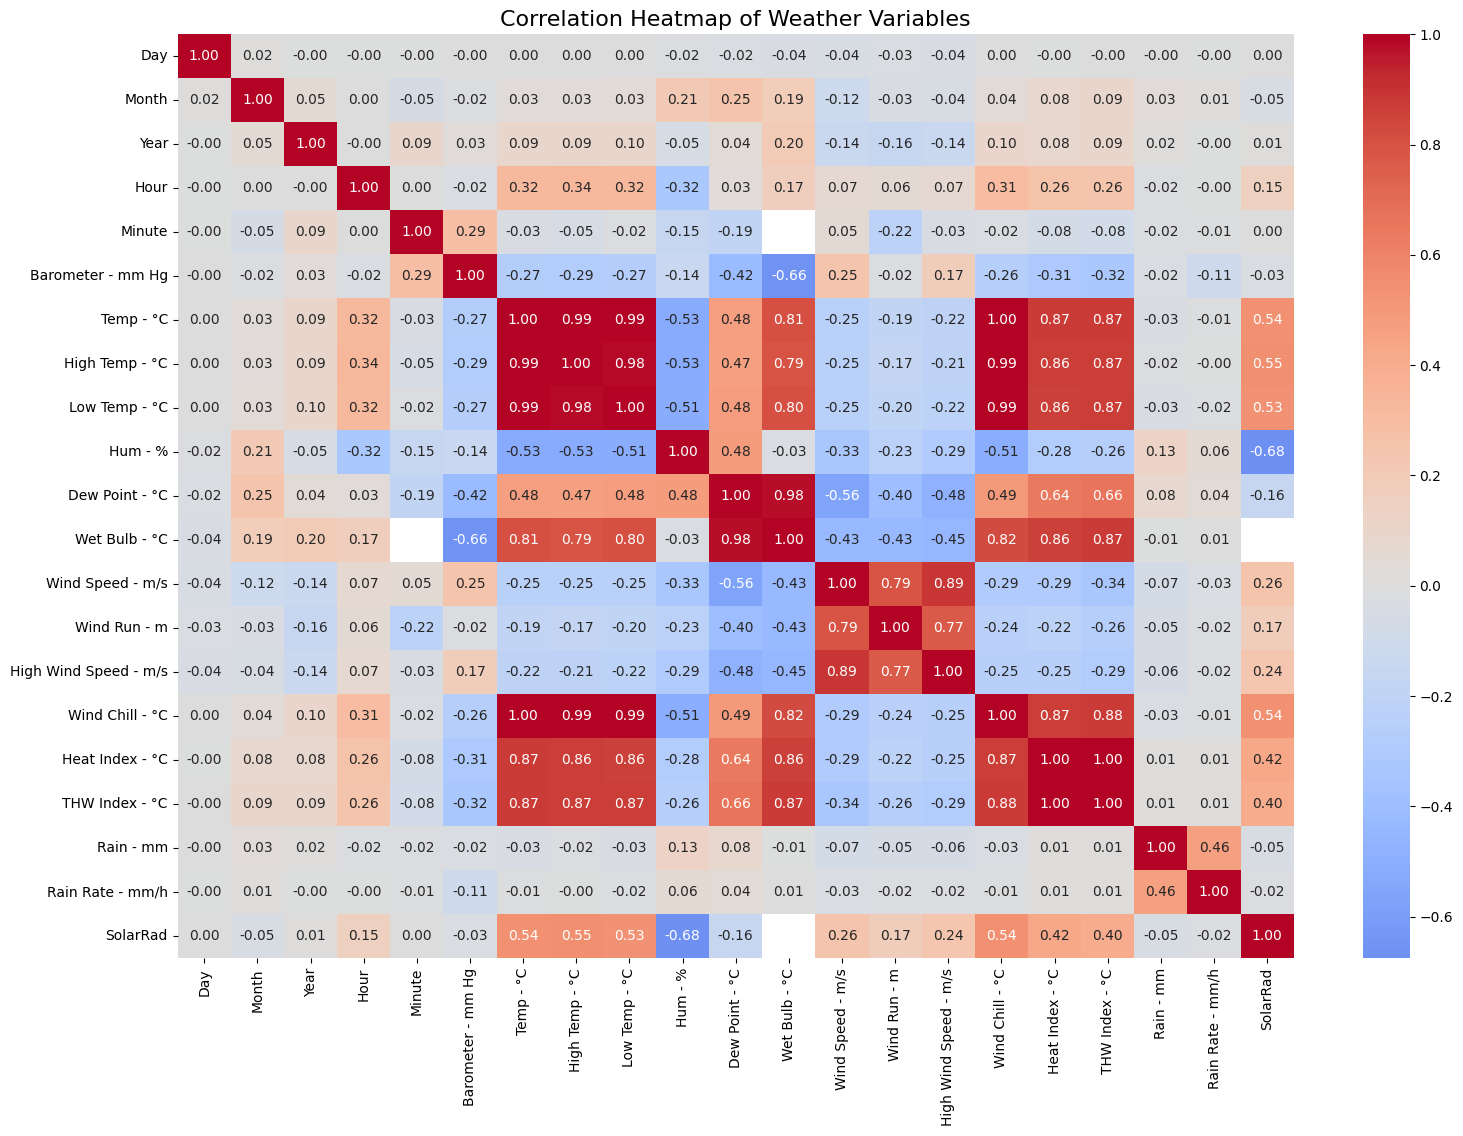

In [11]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(18,12))
sns.heatmap(
    corr,
    cmap="coolwarm",
    center=0,
    annot=True,      
    fmt=".2f",               
    annot_kws={"size": 10}   
)
plt.title("Correlation Heatmap of Weather Variables", fontsize=16)
plt.show()

In [12]:
# Correlation matrix
corr = numeric_df.corr()

# Focus only on correlation with temperature
temp_corr = corr["Temp - °C"].sort_values(ascending=False)

temp_corr


Temp - °C                1.000000
Wind Chill - °C          0.996164
High Temp - °C           0.993290
Low Temp - °C            0.992014
THW Index - °C           0.874171
Heat Index - °C          0.869322
Wet Bulb - °C            0.805952
SolarRad                 0.543491
Dew Point - °C           0.475459
Hour                     0.323146
Year                     0.091820
Month                    0.029852
Day                      0.003554
Rain Rate - mm/h        -0.011173
Rain - mm               -0.029422
Minute                  -0.034042
Wind Run - m            -0.187703
High Wind Speed - m/s   -0.215400
Wind Speed - m/s        -0.248417
Barometer - mm Hg       -0.274009
Hum - %                 -0.527505
Name: Temp - °C, dtype: float64

In [13]:
df = df[['Barometer - mm Hg', 'Hum - %', 'Dew Point - °C', 'SolarRad', 'Wind Speed - m/s', 
         'High Wind Speed - m/s', 'Wind Run - m', 'Rain - mm', 'Rain Rate - mm/h', 'Wind Direction','Heat Index - °C',
         'Hour', 'Month', 'Year','Day','Temp - °C']]

In [14]:
df

,Barometer - mm Hg,Hum - %,Dew Point - °C,SolarRad,Wind Speed - m/s,High Wind Speed - m/s,Wind Run - m,Rain - mm,Rain Rate - mm/h,Wind Direction,Heat Index - °C,Hour,Month,Year,Day,Temp - °C
0,769.0,49.0,12.9,0.0,0.0,0.0,0.00,0.0,0.0,NaN,24.2,19.0,2.0,2006.0,5.0,24.3
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,2.0,2006.0,5.0,NaN
2,768.9,37.0,13.2,799.0,1.3,4.5,0.70,0.0,0.0,E,29.2,23.0,2.0,2006.0,6.0,29.4
3,768.5,33.0,12.3,853.0,1.8,4.9,0.90,0.0,0.0,ESE,29.7,23.0,2.0,2006.0,6.0,30.4
4,768.1,33.0,12.9,889.0,1.3,5.8,0.70,0.0,0.0,E,30.2,0.0,2.0,2006.0,7.0,31.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67519,755.5,86.0,22.9,NaN,1.8,6.7,1.79,0.0,0.0,S,27.5,5.0,3.0,24.0,25.0,25.4
67520,756.0,86.0,22.8,NaN,2.2,7.6,2.24,0.0,0.0,ENE,27.4,6.0,3.0,24.0,25.0,25.3
67521,756.5,86.0,22.8,NaN,1.8,6.7,1.79,0.0,0.0,NE,27.4,7.0,3.0,24.0,25.0,25.3
67522,756.9,82.0,22.8,NaN,2.7,7.6,2.68,0.0,0.0,S,28.6,8.0,3.0,24.0,25.0,26.1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67524 entries, 0 to 67523
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Barometer - mm Hg      67518 non-null  float64
 1   Hum - %                67130 non-null  float64
 2   Dew Point - °C         67130 non-null  float64
 3   SolarRad               25770 non-null  float64
 4   Wind Speed - m/s       67219 non-null  float64
 5   High Wind Speed - m/s  67264 non-null  float64
 6   Wind Run - m           67219 non-null  float64
 7   Rain - mm              67264 non-null  float64
 8   Rain Rate - mm/h       67264 non-null  float64
 9   Wind Direction         65677 non-null  object 
 10  Heat Index - °C        67211 non-null  float64
 11  Hour                   67521 non-null  float64
 12  Month                  67521 non-null  float64
 13  Year                   67521 non-null  float64
 14  Day                    67521 non-null  float64
 15  Te

In [16]:
print("Missing values in df:")
print(df.isna().sum())

Missing values in df:
Barometer - mm Hg            6
Hum - %                    394
Dew Point - °C             394
SolarRad                 41754
Wind Speed - m/s           305
High Wind Speed - m/s      260
Wind Run - m               305
Rain - mm                  260
Rain Rate - mm/h           260
Wind Direction            1847
Heat Index - °C            313
Hour                         3
Month                        3
Year                         3
Day                          3
Temp - °C                  312
dtype: int64


In [17]:
df.dropna(subset=['Barometer - mm Hg', 'Hour', 'Month', 'Year'], inplace=True)

In [18]:
df.drop(columns='SolarRad', inplace=True)

In [19]:
df.isna().sum()

Barometer - mm Hg           0
Hum - %                   388
Dew Point - °C            388
Wind Speed - m/s          299
High Wind Speed - m/s     254
Wind Run - m              299
Rain - mm                 254
Rain Rate - mm/h          254
Wind Direction           1841
Heat Index - °C           307
Hour                        0
Month                       0
Year                        0
Day                         0
Temp - °C                 306
dtype: int64

#### Percentage of Missing Values 

In [20]:
missing = df[['Hum - %','Dew Point - °C','Wind Speed - m/s',
              'High Wind Speed - m/s','Wind Run - m','Rain - mm','Rain Rate - mm/h']].isna().sum()

percent_missing = (missing / len(df)) * 100
percent_missing


Hum - %                  0.574662
Dew Point - °C           0.574662
Wind Speed - m/s         0.442845
High Wind Speed - m/s    0.376196
Wind Run - m             0.442845
Rain - mm                0.376196
Rain Rate - mm/h         0.376196
dtype: float64

#### Filling Missing Values 

In [21]:
# Interpolation for continuous climate variables
df['Hum - %'] = df['Hum - %'].interpolate(method='linear')
df['Dew Point - °C'] = df['Dew Point - °C'].interpolate(method='linear')
df['Temp - °C'] = df['Temp - °C'].interpolate(method='linear')
df['Wind Speed - m/s'] = df['Wind Speed - m/s'].interpolate(method='linear')
df['Heat Index - °C'] = df['Heat Index - °C'].interpolate(method='linear')

# Forward fill for cumulative / max values
df['High Wind Speed - m/s'] = df['High Wind Speed - m/s'].fillna(method='ffill')
df['Wind Run - m'] = df['Wind Run - m'].fillna(method='ffill')

# Fill rain with 0
df['Rain - mm'] = df['Rain - mm'].fillna(0)
df['Rain Rate - mm/h'] = df['Rain Rate - mm/h'].fillna(0)


C:\Users\Alaa\AppData\Local\Temp\ipykernel_28152\1829117533.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['High Wind Speed - m/s'] = df['High Wind Speed - m/s'].fillna(method='ffill')
C:\Users\Alaa\AppData\Local\Temp\ipykernel_28152\1829117533.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Wind Run - m'] = df['Wind Run - m'].fillna(method='ffill')


In [22]:
df.to_csv("cleaned_weather.csv", index=False)

In [23]:
df

,Barometer - mm Hg,Hum - %,Dew Point - °C,Wind Speed - m/s,High Wind Speed - m/s,Wind Run - m,Rain - mm,Rain Rate - mm/h,Wind Direction,Heat Index - °C,Hour,Month,Year,Day,Temp - °C
0,769.0,49.0,12.9,0.0,0.0,0.00,0.0,0.0,NaN,24.2,19.0,2.0,2006.0,5.0,24.3
2,768.9,37.0,13.2,1.3,4.5,0.70,0.0,0.0,E,29.2,23.0,2.0,2006.0,6.0,29.4
3,768.5,33.0,12.3,1.8,4.9,0.90,0.0,0.0,ESE,29.7,23.0,2.0,2006.0,6.0,30.4
4,768.1,33.0,12.9,1.3,5.8,0.70,0.0,0.0,E,30.2,0.0,2.0,2006.0,7.0,31.1
5,767.6,30.0,11.7,1.8,6.3,0.90,0.0,0.0,E,30.2,0.0,2.0,2006.0,7.0,31.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67519,755.5,86.0,22.9,1.8,6.7,1.79,0.0,0.0,S,27.5,5.0,3.0,24.0,25.0,25.4
67520,756.0,86.0,22.8,2.2,7.6,2.24,0.0,0.0,ENE,27.4,6.0,3.0,24.0,25.0,25.3
67521,756.5,86.0,22.8,1.8,6.7,1.79,0.0,0.0,NE,27.4,7.0,3.0,24.0,25.0,25.3
67522,756.9,82.0,22.8,2.7,7.6,2.68,0.0,0.0,S,28.6,8.0,3.0,24.0,25.0,26.1


#### 4. Monthly average temperature

C:\Users\Alaa\AppData\Local\Temp\ipykernel_28152\4018576091.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x="Month", y="Temp - °C", estimator="mean", ci=None)


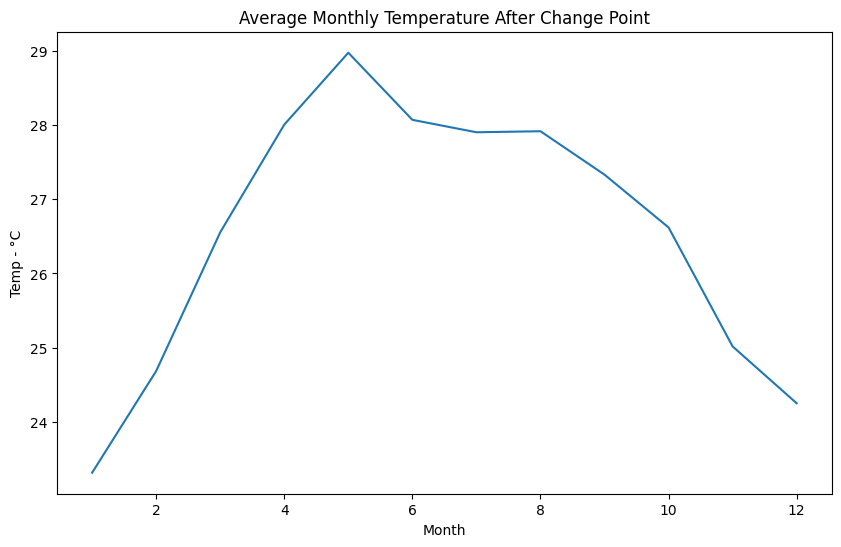

In [24]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x="Month", y="Temp - °C", estimator="mean", ci=None)
plt.title("Average Monthly Temperature After Change Point")
plt.show()

#### 5. Yearly average rainfall

C:\Users\Alaa\AppData\Local\Temp\ipykernel_28152\883681950.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Year", y="Rain - mm", estimator="mean", ci=None)


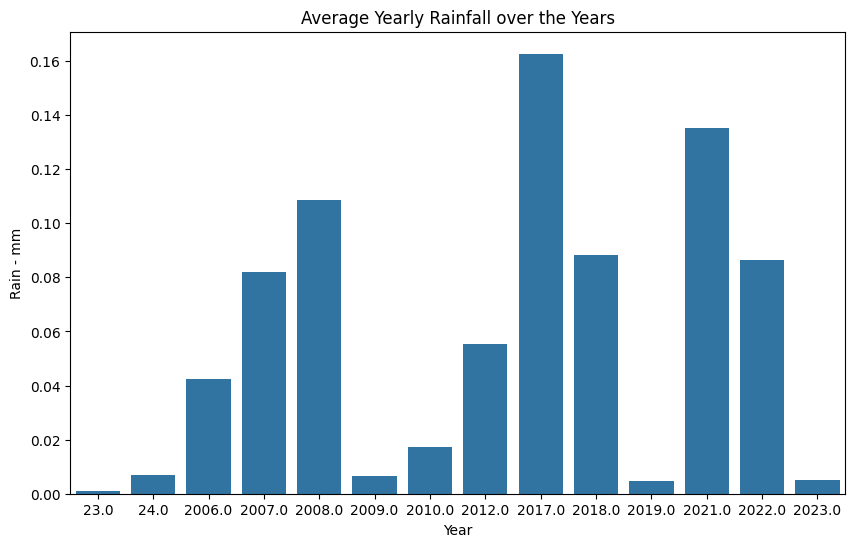

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="Year", y="Rain - mm", estimator="mean", ci=None)
plt.title("Average Yearly Rainfall over the Years")
plt.show()

In [26]:
df.columns

Index(['Barometer - mm Hg', 'Hum - %', 'Dew Point - °C', 'Wind Speed - m/s',
       'High Wind Speed - m/s', 'Wind Run - m', 'Rain - mm',
       'Rain Rate - mm/h', 'Wind Direction', 'Heat Index - °C', 'Hour',
       'Month', 'Year', 'Day', 'Temp - °C'],
      dtype='object')

| **Feature**         | **Unit** | **Meaning**                                                                                                                     |
| ------------------- | -------- | ------------------------------------------------------------------------------------------------------------------------------- |
| **Barometer**       | mm Hg    | Atmospheric pressure measured at the station; lower values often indicate storms or rain, higher values indicate clear weather. |
| **Hum**             | %        | Relative humidity — how much moisture is in the air compared to the maximum it could hold at that temperature.                  |
| **Dew Point**       | °C       | The temperature at which air becomes saturated (100% humidity) and dew forms. Higher values mean more moisture in the air.      |
| **Wind Speed**      | m/s      | Average wind speed over the measurement period.                                                                                 |
| **High Wind Speed** | m/s      | Maximum wind speed (gusts) recorded in the measurement period.                                                                  |
| **Wind Run**        | m        | Total distance the wind has traveled over the measurement period (integrates speed over time).                                  |
| **Rain**            | mm       | Total rainfall collected during the measurement period.                                                                         |
| **Rain Rate**       | mm/h     | Intensity of rainfall (how fast rain is falling).                                                                               |
| **Hour**            | –        | Hour of the day (0–23). Helps in studying daily patterns.                                                                       |
| **Month**           | –        | Month of the year (1–12). Helps capture seasonal effects.                                                                       |
| **Year**            | –        | Year of observation. Useful for long-term trend analysis.                                                                       |
| **Day**             | –        | Day of the month (1–31).                                                                                                        |
| **Temp**            | °C       | Air temperature at the station.                                                                                                 |


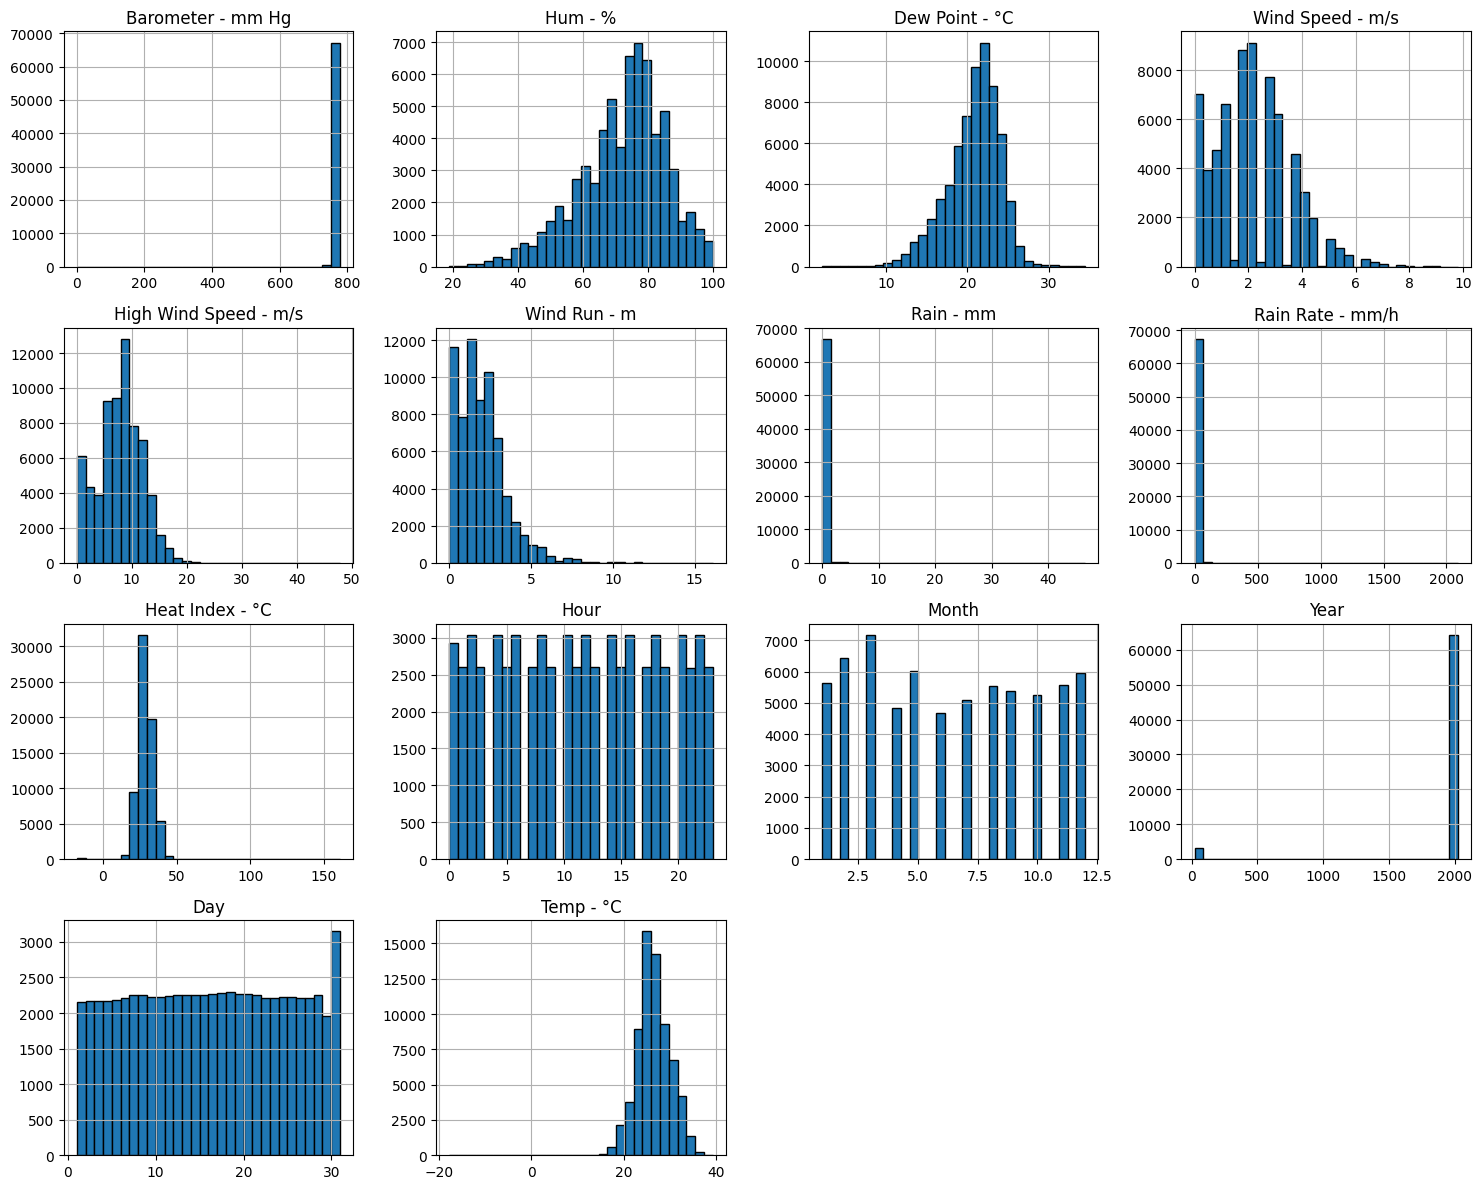

In [27]:
df.hist(figsize=(15, 12), bins=30, edgecolor="black")
plt.tight_layout()
plt.show()

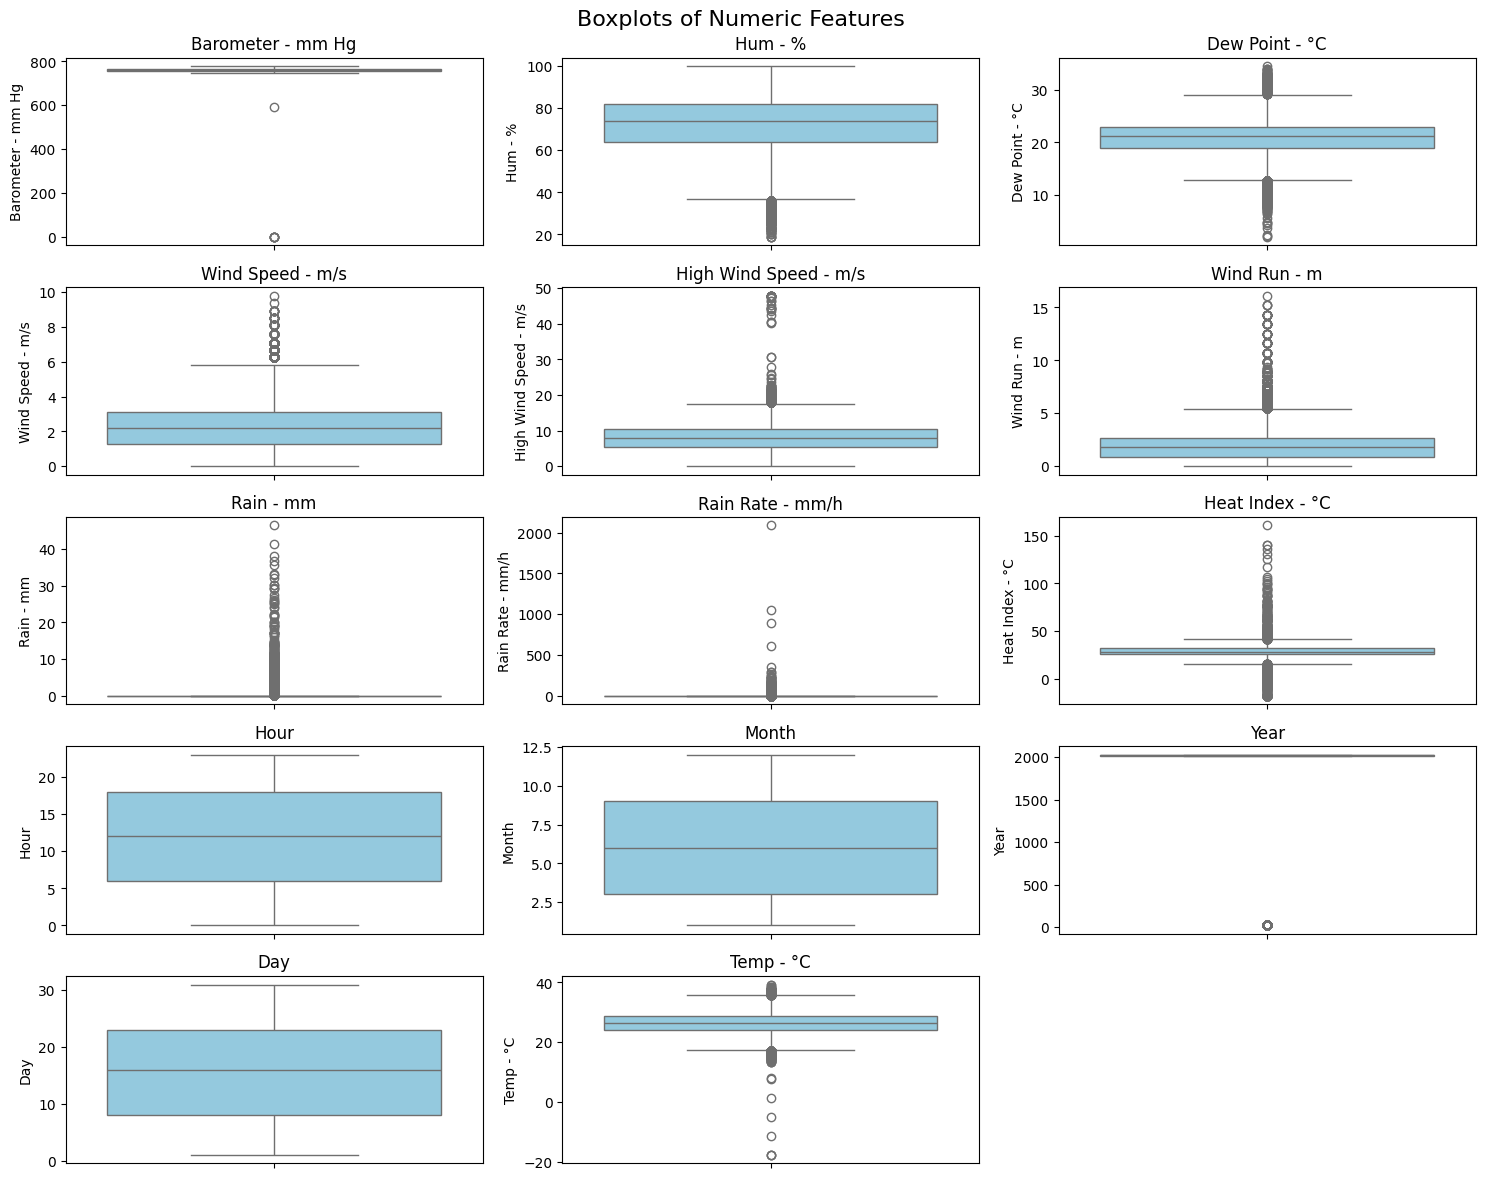

In [28]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Plot boxplots
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols) // 3 + 1, 3, i)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(col)

plt.suptitle("Boxplots of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

In [29]:
invalid_conditions = {
    "Hum - %": (df["Hum - %"] < 0) | (df["Hum - %"] > 100),
    "Rain - mm": (df["Rain - mm"] < 0),
    "Rain Rate - mm/h": (df["Rain Rate - mm/h"] < 0),
    "Temp - °C": (df["Temp - °C"] < 10) | (df["Temp - °C"] > 60),   # extreme Earth range
    "Dew Point - °C": (df["Dew Point - °C"] < -80) | (df["Dew Point - °C"] > 40),
    "Wind Speed - m/s": (df["Wind Speed - m/s"] < 0) | (df["Wind Speed - m/s"] > 100),
    "High Wind Speed - m/s": (df["High Wind Speed - m/s"] < 0) | (df["High Wind Speed - m/s"] > 120),
    "Barometer - mm Hg": (df["Barometer - mm Hg"] < 400) | (df["Barometer - mm Hg"] > 800)  # sea-level range
}

In [30]:
for col, condition in invalid_conditions.items():
    invalid_count = condition.sum()
    if invalid_count > 0:
        print(f"{col}: {invalid_count} invalid values detected")
    else:
        print(f"{col}: all values physically valid")

invalid_rows = pd.DataFrame()
for col, condition in invalid_conditions.items():
    invalid_rows = pd.concat([invalid_rows, df[condition]])

invalid_rows = invalid_rows.drop_duplicates()
print("\nSample of rows with impossible values:")
invalid_rows

Hum - %: all values physically valid
Rain - mm: all values physically valid
Rain Rate - mm/h: all values physically valid
Temp - °C: 8 invalid values detected
Dew Point - °C: all values physically valid
Wind Speed - m/s: all values physically valid
High Wind Speed - m/s: all values physically valid
Barometer - mm Hg: 6 invalid values detected

Sample of rows with impossible values:


,Barometer - mm Hg,Hum - %,Dew Point - °C,Wind Speed - m/s,High Wind Speed - m/s,Wind Run - m,Rain - mm,Rain Rate - mm/h,Wind Direction,Heat Index - °C,Hour,Month,Year,Day,Temp - °C
24071,762.1,77.625000,16.0125,4.000000,9.1,7.32,0.00,0.0,NaN,-17.800000,2.0,1.0,2010.0,6.0,7.800000
24072,761.4,74.500000,15.5500,4.150000,9.1,7.32,0.00,0.0,NaN,-17.800000,4.0,1.0,2010.0,6.0,1.400000
24073,761.9,71.375000,15.0875,4.300000,9.1,7.32,0.00,0.0,NaN,-17.800000,6.0,1.0,2010.0,6.0,-5.000000
24074,762.7,68.250000,14.6250,4.450000,9.1,7.32,0.00,0.0,NaN,-17.800000,8.0,1.0,2010.0,6.0,-11.400000
24075,762.8,65.125000,14.1625,4.600000,4.9,9.14,0.00,0.0,W,-17.800000,10.0,1.0,2010.0,6.0,-17.800000
24320,757.4,62.000000,20.5000,1.200000,1.5,2.44,0.00,0.0,NW,-17.800000,2.0,1.0,2010.0,29.0,-17.800000
24321,0.0,50.500000,19.3000,1.350000,1.5,2.44,0.00,0.0,NaN,8.900000,7.0,2.0,2010.0,1.0,8.050000
25021,591.0,53.500000,15.0000,0.000000,0.0,0.00,0.00,0.0,NaN,-17.800000,4.0,4.0,2010.0,26.0,-17.800000
24276,0.0,65.000000,19.5250,1.300000,2.4,0.61,0.00,0.0,NaN,12.333333,11.0,1.0,2010.0,25.0,26.866667
24536,0.0,64.000000,20.5500,2.250000,44.5,3.66,0.00,0.0,NaN,30.100000,5.0,3.0,2010.0,2.0,28.000000


In [31]:
df = df.drop(index=invalid_rows.index)

In [32]:
import numpy as np
import pymannkendall as mk

def pettitt_test(series):
    n = len(series)
    rank = np.argsort(series) + 1
    U = np.zeros(n)
    
    for t in range(n):
        U[t] = 2 * np.sum(rank[:t+1]) - (t+1) * (n+1)
    
    K = np.max(np.abs(U))
    tau = np.argmax(np.abs(U))
    
    p_value = 2 * np.exp((-6 * K**2) / (n**3 + n**2))
    
    return tau, p_value

tau, p = pettitt_test(df["Temp - °C"].values)
print("Change point at index:", tau)
print("p-value:", p)


Change point at index: 32419
p-value: 2.6446119449709266e-08


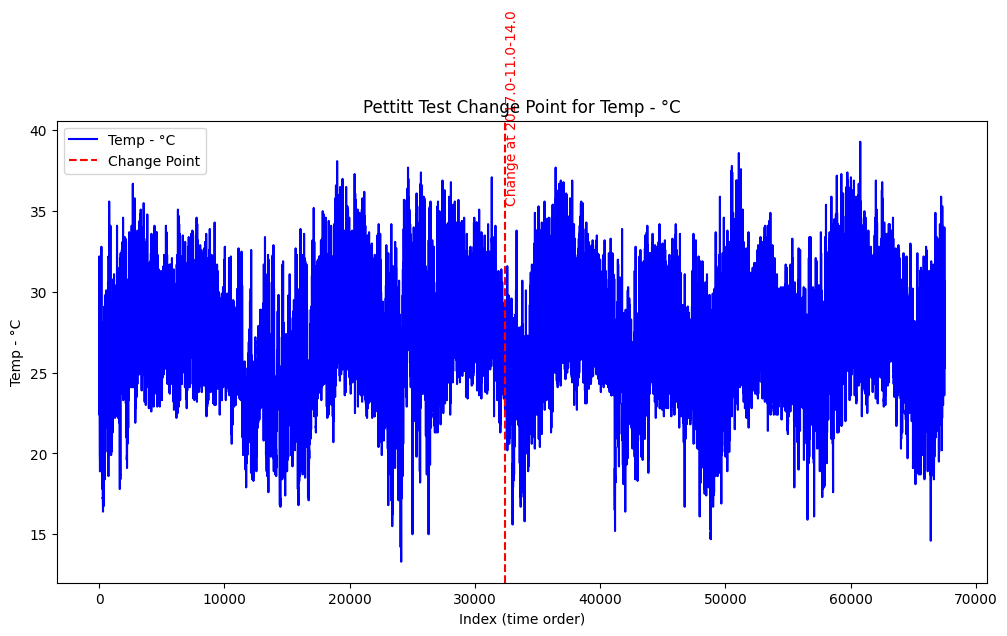

In [33]:
import matplotlib.pyplot as plt

# Choose the variable you tested (example: Rain - mm)
col = "Temp - °C"

# Pettitt test result
change_point = tau  # from your result

# Plot
plt.figure(figsize=(12,6))
plt.plot(df[col].values, label=col, color="blue")

# Mark the change point
plt.axvline(change_point, color="red", linestyle="--", label="Change Point")

# Annotate with date
change_date = df.iloc[change_point][["Year","Month","Day"]]
plt.text(change_point, df[col].max()*0.9,
         f"Change at {change_date['Year']}-{change_date['Month']}-{change_date['Day']}",
         color="red", rotation=90, va="bottom")

plt.title(f"Pettitt Test Change Point for {col}")
plt.xlabel("Index (time order)")
plt.ylabel(col)
plt.legend()
plt.show()


In [34]:
df.iloc[tau]

Barometer - mm Hg         756.5
Hum - %                    77.0
Dew Point - °C             20.3
Wind Speed - m/s            2.7
High Wind Speed - m/s      10.7
Wind Run - m                2.7
Rain - mm                   0.0
Rain Rate - mm/h            0.0
Wind Direction                N
Heat Index - °C            26.0
Hour                       19.0
Month                      11.0
Year                     2017.0
Day                        14.0
Temp - °C                  24.6
Name: 32437, dtype: object

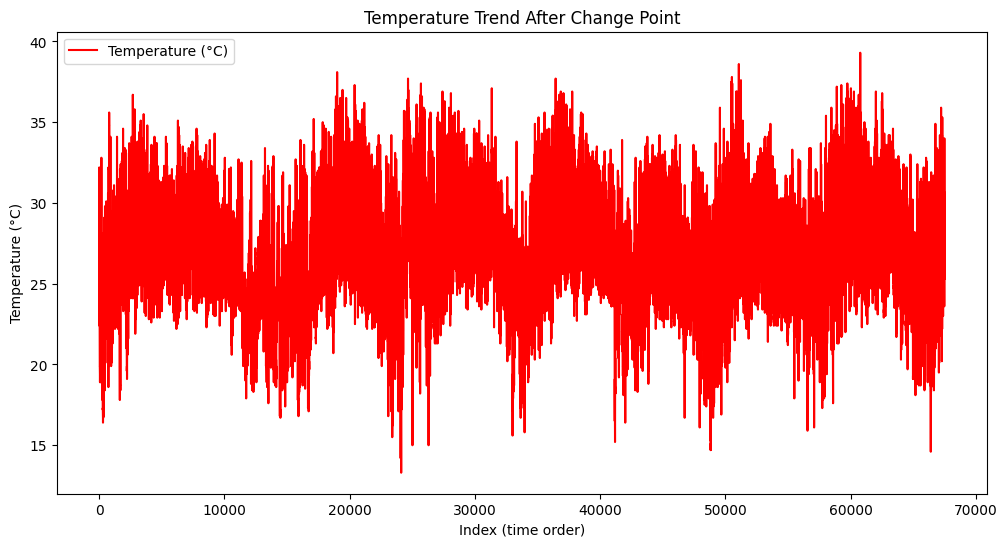

In [35]:
plt.figure(figsize=(12,6))
plt.plot(df["Temp - °C"].values, label="Temperature (°C)", color="red")
plt.xlabel("Index (time order)")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Trend After Change Point")
plt.legend()
plt.show()

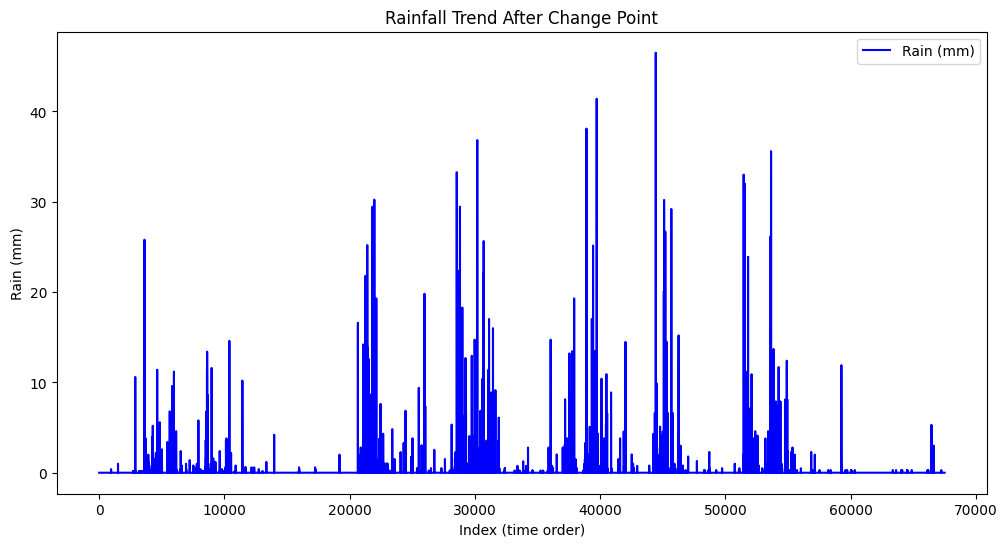

In [36]:
plt.figure(figsize=(12,6))
plt.plot(df["Rain - mm"].values, label="Rain (mm)", color="blue")
plt.xlabel("Index (time order)")
plt.ylabel("Rain (mm)")
plt.title("Rainfall Trend After Change Point")
plt.legend()
plt.show()

In [37]:
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"

df['Season'] = df['Month'].apply(get_season)


In [38]:
df['Day_Night'] = df['Hour'].apply(lambda h: 'Day' if 6 <= h <= 18 else 'Night')

In [39]:
df

,Barometer - mm Hg,Hum - %,Dew Point - °C,Wind Speed - m/s,High Wind Speed - m/s,Wind Run - m,Rain - mm,Rain Rate - mm/h,Wind Direction,Heat Index - °C,Hour,Month,Year,Day,Temp - °C,Season,Day_Night
0,769.0,49.0,12.9,0.0,0.0,0.00,0.0,0.0,NaN,24.2,19.0,2.0,2006.0,5.0,24.3,Winter,Night
2,768.9,37.0,13.2,1.3,4.5,0.70,0.0,0.0,E,29.2,23.0,2.0,2006.0,6.0,29.4,Winter,Night
3,768.5,33.0,12.3,1.8,4.9,0.90,0.0,0.0,ESE,29.7,23.0,2.0,2006.0,6.0,30.4,Winter,Night
4,768.1,33.0,12.9,1.3,5.8,0.70,0.0,0.0,E,30.2,0.0,2.0,2006.0,7.0,31.1,Winter,Night
5,767.6,30.0,11.7,1.8,6.3,0.90,0.0,0.0,E,30.2,0.0,2.0,2006.0,7.0,31.4,Winter,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67519,755.5,86.0,22.9,1.8,6.7,1.79,0.0,0.0,S,27.5,5.0,3.0,24.0,25.0,25.4,Spring,Night
67520,756.0,86.0,22.8,2.2,7.6,2.24,0.0,0.0,ENE,27.4,6.0,3.0,24.0,25.0,25.3,Spring,Day
67521,756.5,86.0,22.8,1.8,6.7,1.79,0.0,0.0,NE,27.4,7.0,3.0,24.0,25.0,25.3,Spring,Day
67522,756.9,82.0,22.8,2.7,7.6,2.68,0.0,0.0,S,28.6,8.0,3.0,24.0,25.0,26.1,Spring,Day


In [40]:
season_map = {"Winter": 0, "Spring": 1, "Summer": 2, "Fall": 3}
df['Season'] = df['Season'].map(season_map)

In [41]:
daynight_map = {"Day": 1, "Night": 0}
df['Day_Night'] = df['Day_Night'].map(daynight_map)

In [42]:
df

,Barometer - mm Hg,Hum - %,Dew Point - °C,Wind Speed - m/s,High Wind Speed - m/s,Wind Run - m,Rain - mm,Rain Rate - mm/h,Wind Direction,Heat Index - °C,Hour,Month,Year,Day,Temp - °C,Season,Day_Night
0,769.0,49.0,12.9,0.0,0.0,0.00,0.0,0.0,NaN,24.2,19.0,2.0,2006.0,5.0,24.3,0,0
2,768.9,37.0,13.2,1.3,4.5,0.70,0.0,0.0,E,29.2,23.0,2.0,2006.0,6.0,29.4,0,0
3,768.5,33.0,12.3,1.8,4.9,0.90,0.0,0.0,ESE,29.7,23.0,2.0,2006.0,6.0,30.4,0,0
4,768.1,33.0,12.9,1.3,5.8,0.70,0.0,0.0,E,30.2,0.0,2.0,2006.0,7.0,31.1,0,0
5,767.6,30.0,11.7,1.8,6.3,0.90,0.0,0.0,E,30.2,0.0,2.0,2006.0,7.0,31.4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67519,755.5,86.0,22.9,1.8,6.7,1.79,0.0,0.0,S,27.5,5.0,3.0,24.0,25.0,25.4,1,0
67520,756.0,86.0,22.8,2.2,7.6,2.24,0.0,0.0,ENE,27.4,6.0,3.0,24.0,25.0,25.3,1,1
67521,756.5,86.0,22.8,1.8,6.7,1.79,0.0,0.0,NE,27.4,7.0,3.0,24.0,25.0,25.3,1,1
67522,756.9,82.0,22.8,2.7,7.6,2.68,0.0,0.0,S,28.6,8.0,3.0,24.0,25.0,26.1,1,1


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67505 entries, 0 to 67523
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Barometer - mm Hg      67505 non-null  float64
 1   Hum - %                67505 non-null  float64
 2   Dew Point - °C         67505 non-null  float64
 3   Wind Speed - m/s       67505 non-null  float64
 4   High Wind Speed - m/s  67505 non-null  float64
 5   Wind Run - m           67505 non-null  float64
 6   Rain - mm              67505 non-null  float64
 7   Rain Rate - mm/h       67505 non-null  float64
 8   Wind Direction         65674 non-null  object 
 9   Heat Index - °C        67505 non-null  float64
 10  Hour                   67505 non-null  float64
 11  Month                  67505 non-null  float64
 12  Year                   67505 non-null  float64
 13  Day                    67505 non-null  float64
 14  Temp - °C              67505 non-null  float64
 15  Season 

In [44]:
df['Wind Direction'].value_counts()

Wind Direction
NW     12355
N      11300
NE      8405
WNW     6452
ENE     4316
ESE     3492
NNE     3365
S       3045
E       2664
SE      2379
---     1549
NNW     1434
W       1293
SSE     1151
SSW     1080
SW       877
WSW      472
--        45
Name: count, dtype: int64

In [45]:
df = df[~df['Wind Direction'].isin(['---', '--'])]
df = df.dropna(subset=['Wind Direction']) 

In [46]:
direction_map = {
    "N": 0, "NNE": 22.5, "NE": 45, "ENE": 67.5,
    "E": 90, "ESE": 112.5, "SE": 135, "SSE": 157.5,
    "S": 180, "SSW": 202.5, "SW": 225, "WSW": 247.5,
    "W": 270, "WNW": 292.5, "NW": 315, "NNW": 337.5
}

df['Wind_Dir_Deg'] = df['Wind Direction'].map(direction_map)


In [47]:
df['Wind Direction'].value_counts()

Wind Direction
NW     12355
N      11300
NE      8405
WNW     6452
ENE     4316
ESE     3492
NNE     3365
S       3045
E       2664
SE      2379
NNW     1434
W       1293
SSE     1151
SSW     1080
SW       877
WSW      472
Name: count, dtype: int64

In [48]:
import numpy as np

# Convert degrees to radians
df['Wind_Dir_Rad'] = np.deg2rad(df['Wind_Dir_Deg'])

# Encode circular
df['Wind_Dir_sin'] = np.sin(df['Wind_Dir_Rad'])
df['Wind_Dir_cos'] = np.cos(df['Wind_Dir_Rad'])

# Drop the original columns
df.drop(columns=['Wind Direction', 'Wind_Dir_Deg', 'Wind_Dir_Rad'], inplace=True)


In [49]:
df["Wind_Dir_sin"] = df["Wind_Dir_sin"].interpolate()
df["Wind_Dir_cos"] = df["Wind_Dir_cos"].interpolate()

In [50]:
import numpy as np

df["Wind_Direction"] = np.degrees(np.arctan2(df["Wind_Dir_sin"], df["Wind_Dir_cos"]))
df["Wind_Direction"] = (df["Wind_Direction"] + 360) % 360

In [51]:
df

,Barometer - mm Hg,Hum - %,Dew Point - °C,Wind Speed - m/s,High Wind Speed - m/s,Wind Run - m,Rain - mm,Rain Rate - mm/h,Heat Index - °C,Hour,Month,Year,Day,Temp - °C,Season,Day_Night,Wind_Dir_sin,Wind_Dir_cos,Wind_Direction
2,768.9,37.0,13.2,1.3,4.5,0.70,0.0,0.0,29.2,23.0,2.0,2006.0,6.0,29.4,0,0,1.000000e+00,6.123234e-17,90.0
3,768.5,33.0,12.3,1.8,4.9,0.90,0.0,0.0,29.7,23.0,2.0,2006.0,6.0,30.4,0,0,9.238795e-01,-3.826834e-01,112.5
4,768.1,33.0,12.9,1.3,5.8,0.70,0.0,0.0,30.2,0.0,2.0,2006.0,7.0,31.1,0,0,1.000000e+00,6.123234e-17,90.0
5,767.6,30.0,11.7,1.8,6.3,0.90,0.0,0.0,30.2,0.0,2.0,2006.0,7.0,31.4,0,0,1.000000e+00,6.123234e-17,90.0
6,767.2,29.0,11.7,1.8,5.8,0.90,0.0,0.0,31.1,1.0,2.0,2006.0,7.0,32.0,0,0,9.238795e-01,-3.826834e-01,112.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67519,755.5,86.0,22.9,1.8,6.7,1.79,0.0,0.0,27.5,5.0,3.0,24.0,25.0,25.4,1,0,1.224647e-16,-1.000000e+00,180.0
67520,756.0,86.0,22.8,2.2,7.6,2.24,0.0,0.0,27.4,6.0,3.0,24.0,25.0,25.3,1,1,9.238795e-01,3.826834e-01,67.5
67521,756.5,86.0,22.8,1.8,6.7,1.79,0.0,0.0,27.4,7.0,3.0,24.0,25.0,25.3,1,1,7.071068e-01,7.071068e-01,45.0
67522,756.9,82.0,22.8,2.7,7.6,2.68,0.0,0.0,28.6,8.0,3.0,24.0,25.0,26.1,1,1,1.224647e-16,-1.000000e+00,180.0


In [52]:
df['Wind_Dir_cos'].value_counts()

Wind_Dir_cos
 7.071068e-01    12355
 1.000000e+00    11300
 7.071068e-01     8405
 3.826834e-01     6452
 3.826834e-01     4316
-3.826834e-01     3492
 9.238795e-01     3365
-1.000000e+00     3045
 6.123234e-17     2664
-7.071068e-01     2379
 9.238795e-01     1434
-1.836970e-16     1293
-9.238795e-01     1151
-9.238795e-01     1080
-7.071068e-01      877
-3.826834e-01      472
Name: count, dtype: int64

In [53]:
df['Wind_Dir_sin'].value_counts()

Wind_Dir_sin
-7.071068e-01    12355
 0.000000e+00    11300
 7.071068e-01    10784
 9.238795e-01     7808
-9.238795e-01     6452
 3.826834e-01     3365
 1.224647e-16     3045
 1.000000e+00     2664
-3.826834e-01     1434
-1.000000e+00     1293
 3.826834e-01     1151
-3.826834e-01     1080
-7.071068e-01      877
-9.238795e-01      472
Name: count, dtype: int64

In [54]:
df[['Wind_Dir_sin','Wind_Dir_cos']].isna().sum()


Wind_Dir_sin    0
Wind_Dir_cos    0
dtype: int64

In [55]:
df.columns

Index(['Barometer - mm Hg', 'Hum - %', 'Dew Point - °C', 'Wind Speed - m/s',
       'High Wind Speed - m/s', 'Wind Run - m', 'Rain - mm',
       'Rain Rate - mm/h', 'Heat Index - °C', 'Hour', 'Month', 'Year', 'Day',
       'Temp - °C', 'Season', 'Day_Night', 'Wind_Dir_sin', 'Wind_Dir_cos',
       'Wind_Direction'],
      dtype='object')

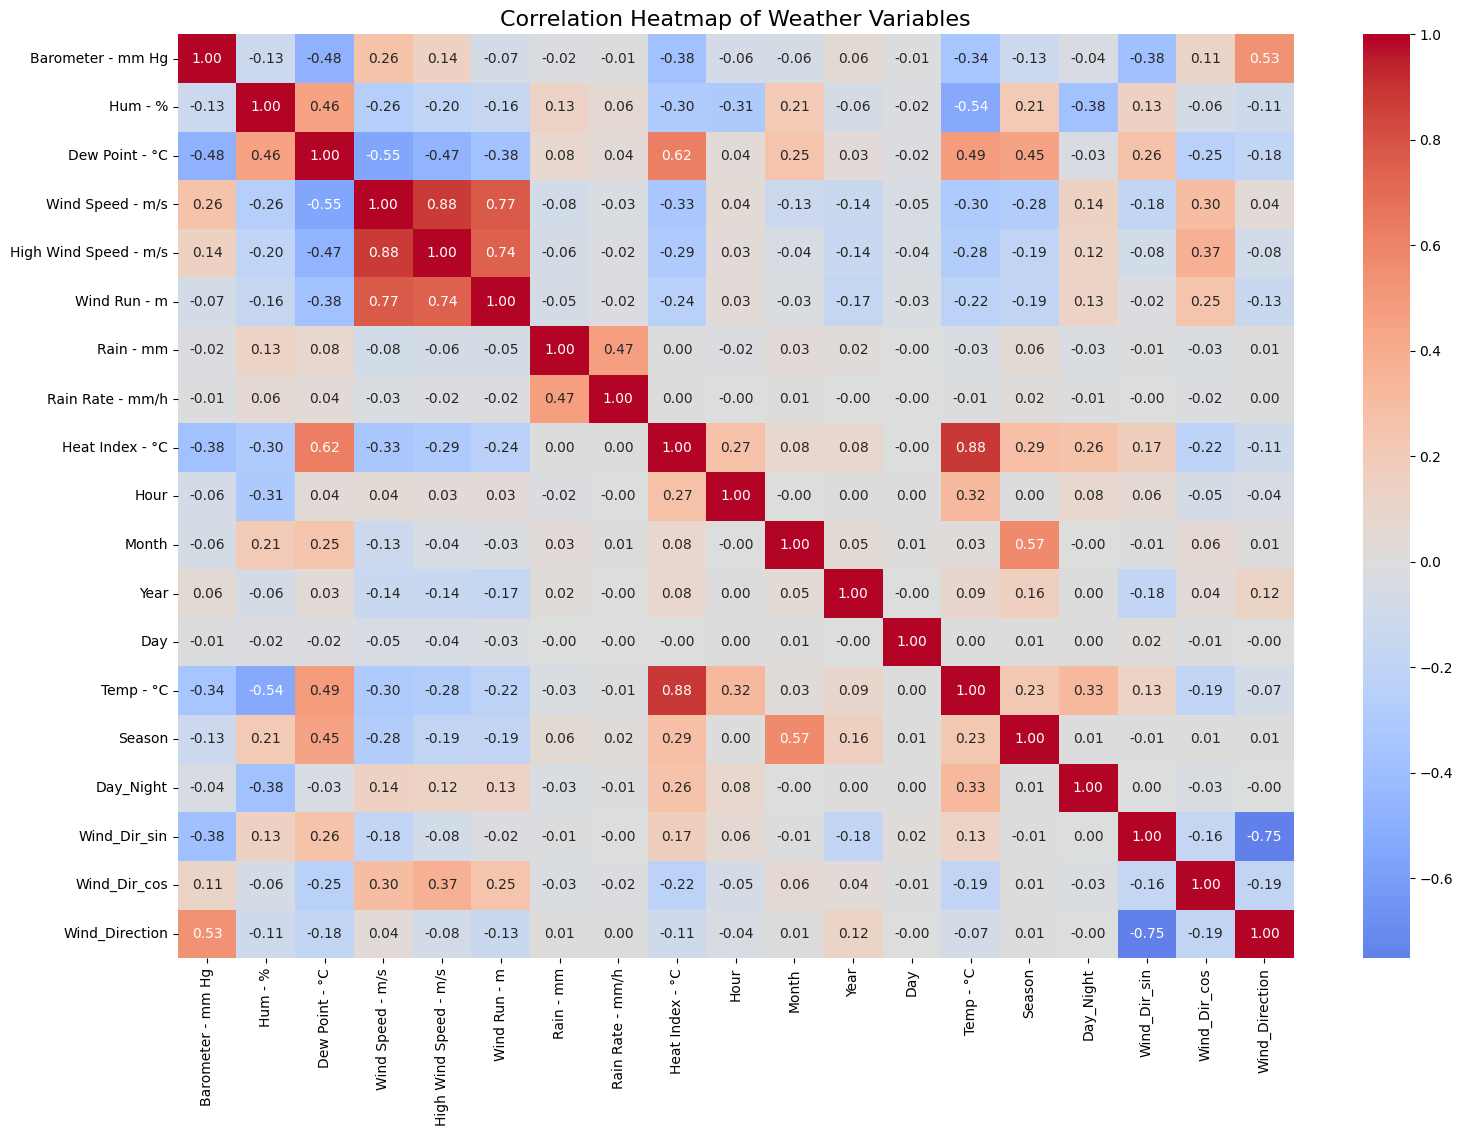

In [56]:
corr = df.corr()

plt.figure(figsize=(18,12))
sns.heatmap(
    corr,
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f",
    annot_kws={"size": 10}
)
plt.title("Correlation Heatmap of Weather Variables", fontsize=16)
plt.show()

In [57]:
# Select data from the change point onwards
change_point = tau
df_model_after_Pettit = df.iloc[change_point:].reset_index(drop=True)

In [58]:
df_model_before_Pettit = df.drop(
    columns=['High Wind Speed - m/s', 'Wind Run - m', 'Hour','Month','Year','Day','Rain Rate - mm/h','Dew Point - °C', 'Wind_Direction', 'Day_Night']
)
df_model_after_Pettit = df.iloc[change_point:].drop(
    columns=['High Wind Speed - m/s', 'Wind Run - m', 'Hour','Month','Year','Day','Rain Rate - mm/h','Dew Point - °C', 'Wind_Direction', 'Day_Night']
).reset_index(drop=True)

In [59]:
df.shape

(64080, 19)

In [60]:
df_model_before_Pettit.shape

(64080, 9)

In [61]:
df_model_after_Pettit.shape

(31661, 9)

In [62]:
df_model_before_Pettit.columns

Index(['Barometer - mm Hg', 'Hum - %', 'Wind Speed - m/s', 'Rain - mm',
       'Heat Index - °C', 'Temp - °C', 'Season', 'Wind_Dir_sin',
       'Wind_Dir_cos'],
      dtype='object')

In [63]:
df_model_after_Pettit.columns

Index(['Barometer - mm Hg', 'Hum - %', 'Wind Speed - m/s', 'Rain - mm',
       'Heat Index - °C', 'Temp - °C', 'Season', 'Wind_Dir_sin',
       'Wind_Dir_cos'],
      dtype='object')

In [64]:
print("Missing values in df_model_before_Pettit:")
print(df_model_before_Pettit.isna().sum())

print("\nMissing values in df_model_after_Pettit:")
print(df_model_after_Pettit.isna().sum())


Missing values in df_model_before_Pettit:
Barometer - mm Hg    0
Hum - %              0
Wind Speed - m/s     0
Rain - mm            0
Heat Index - °C      0
Temp - °C            0
Season               0
Wind_Dir_sin         0
Wind_Dir_cos         0
dtype: int64

Missing values in df_model_after_Pettit:
Barometer - mm Hg    0
Hum - %              0
Wind Speed - m/s     0
Rain - mm            0
Heat Index - °C      0
Temp - °C            0
Season               0
Wind_Dir_sin         0
Wind_Dir_cos         0
dtype: int64


In [65]:
# Check for NaN values in both datasets
print("Missing values in df_model_before_Pettit:")
print(df_model_before_Pettit.isna().sum()[df_model_before_Pettit.isna().sum() > 0])

print("\nMissing values in df_model_after_Pettit:")
print(df_model_after_Pettit.isna().sum()[df_model_after_Pettit.isna().sum() > 0])


Missing values in df_model_before_Pettit:
Series([], dtype: int64)

Missing values in df_model_after_Pettit:
Series([], dtype: int64)


## Feature Description Table

| Feature              | Type        | Description                                                                 |
|-----------------------|------------|-----------------------------------------------------------------------------|
| **Barometer - mm Hg** | Numerical  | Atmospheric pressure measured in millimeters of mercury (mmHg).             |
| **Hum - %**           | Numerical  | Relative humidity, representing moisture content in the air (%).             |
| **Dew Point - °C**    | Numerical  | Temperature at which air becomes saturated, causing condensation (°C).       |
| **Wind Speed - m/s**  | Numerical  | Average wind speed recorded in meters per second (m/s).                      |
| **Rain - mm**         | Numerical  | Total precipitation (rainfall) recorded in millimeters (mm).                 |
| **Rain Rate - mm/h**  | Numerical  | Intensity of rainfall, measured as millimeters per hour (mm/h).              |
| **Temp - °C**         | Target     | Air temperature (dependent variable to predict).                             |
| **Season**            | Categorical| Derived feature indicating the season (Winter, Spring, Summer, Autumn).      |
| **Day_Night**         | Categorical| Derived feature indicating day vs. night based on hour.                      |
| **Wind_Dir_sin**      | Numerical  | Sine transformation of wind direction (cyclical encoding).                   |
| **Wind_Dir_cos**      | Numerical  | Cosine transformation of wind direction (cyclical encoding).                 |
---------------------------------------------------------------------------------------------------------------------

Before Pettit
                     count        mean        std    min           25%  \
Barometer - mm Hg  64080.0  761.495844   5.256065  744.9  7.572000e+02   
Hum - %            64080.0   71.410268  12.956884   19.0  6.400000e+01   
Wind Speed - m/s   64080.0    2.282974   1.365219    0.0  1.300000e+00   
Rain - mm          64080.0    0.069388   0.863669    0.0  0.000000e+00   
Heat Index - °C    64080.0   28.810285   5.487224  -17.8  2.550000e+01   
Temp - °C          64080.0   26.542293   3.554955   13.3  2.420000e+01   
Season             64080.0    1.428714   1.123809    0.0  0.000000e+00   
Wind_Dir_sin       64080.0    0.019083   0.679031   -1.0 -7.071068e-01   
Wind_Dir_cos       64080.0    0.399633   0.615515   -1.0  6.123234e-17   

                          50%         75%    max       skew        kurt  
Barometer - mm Hg  760.000000  766.400000  778.2   0.373777   -0.974666  
Hum - %             73.000000   81.000000  100.0  -0.655138    0.305051  
Wind Speed - m/s     2.

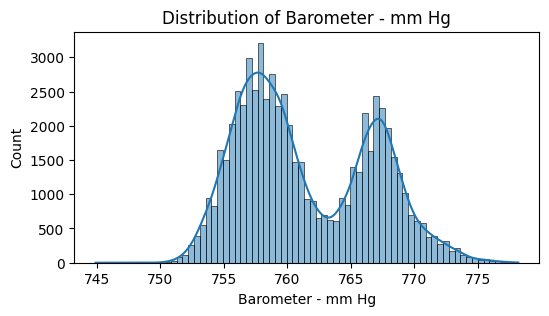

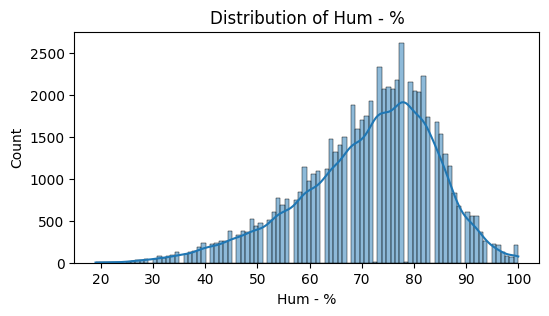

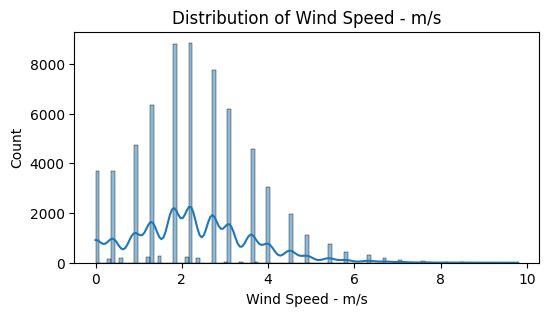

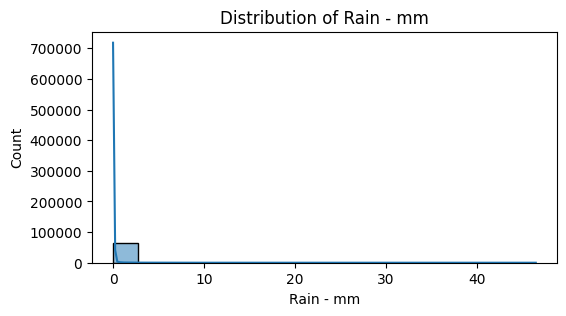

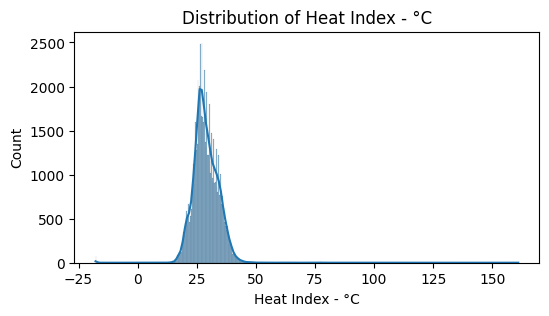

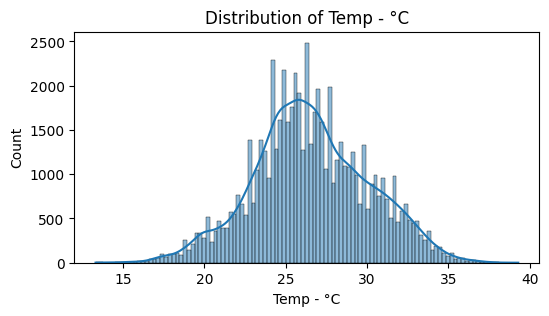

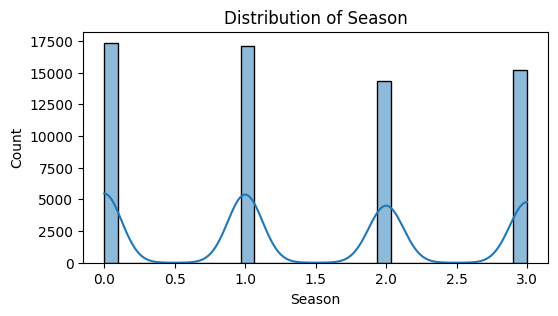

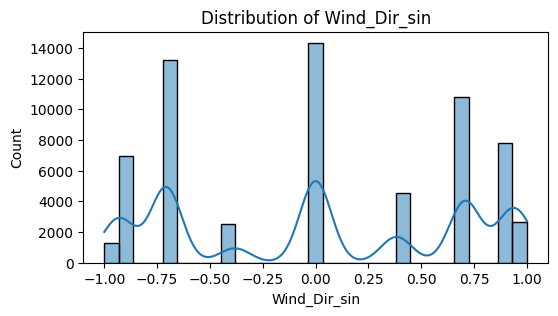

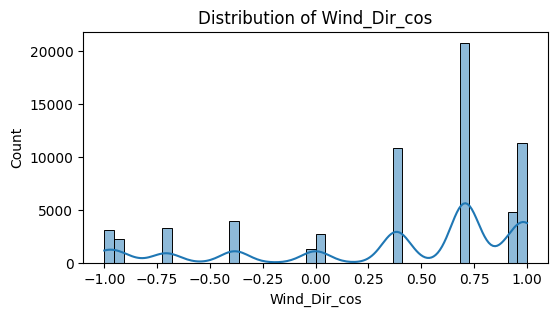

After Pettit
                     count        mean        std    min           25%  \
Barometer - mm Hg  31661.0  758.484331   2.503238  744.9  7.568000e+02   
Hum - %            31661.0   74.784262  11.500801   24.0  6.800000e+01   
Wind Speed - m/s   31661.0    2.344648   1.301227    0.0  1.300000e+00   
Rain - mm          31661.0    0.062328   0.853375    0.0  0.000000e+00   
Heat Index - °C    31661.0   29.399000   5.414529   14.3  2.570000e+01   
Temp - °C          31661.0   26.619685   3.491624   14.7  2.430000e+01   
Season             31661.0    1.440226   1.166279    0.0  0.000000e+00   
Wind_Dir_sin       31661.0    0.320972   0.553205   -1.0  0.000000e+00   
Wind_Dir_cos       31661.0    0.346432   0.686258   -1.0  6.123234e-17   

                          50%         75%    max       skew         kurt  
Barometer - mm Hg  758.400000  760.100000  768.3   0.138086     0.029107  
Hum - %             77.000000   83.000000  100.0  -0.748035     0.666295  
Wind Speed - m/s     

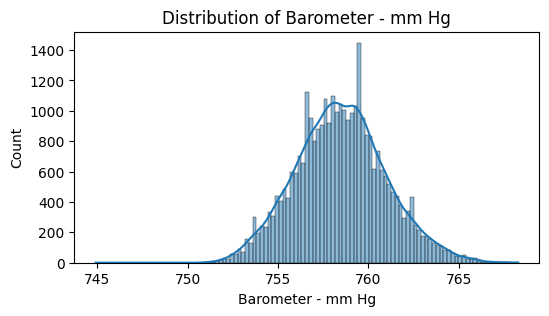

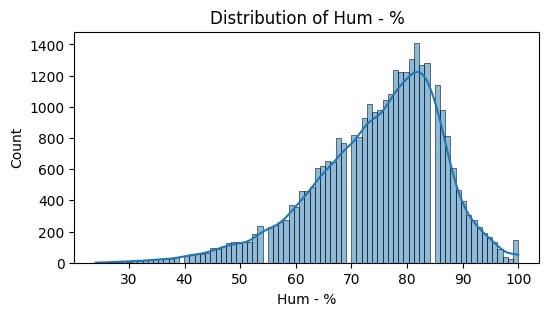

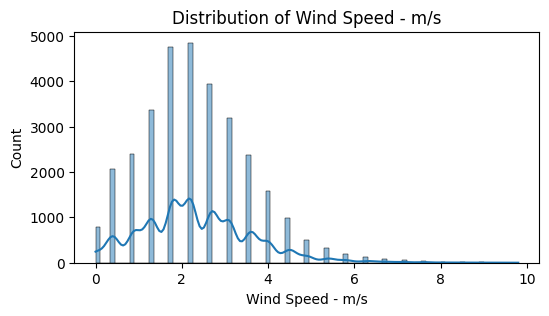

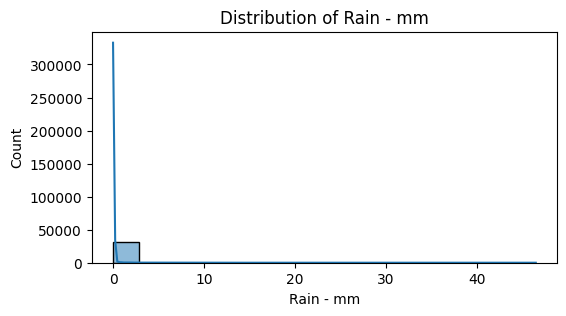

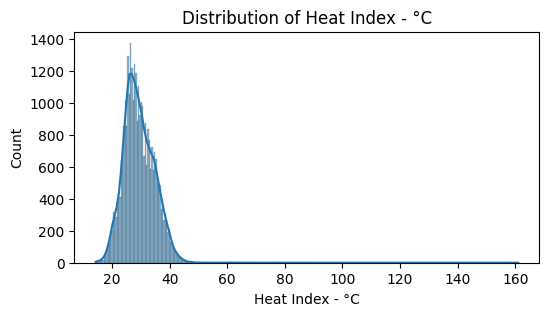

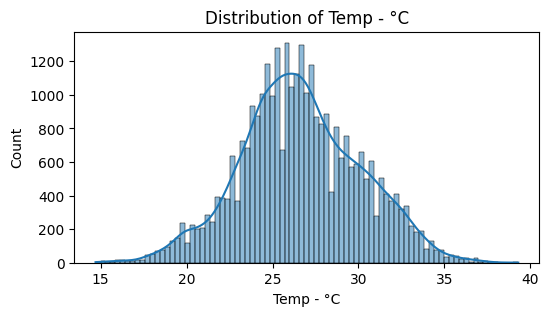

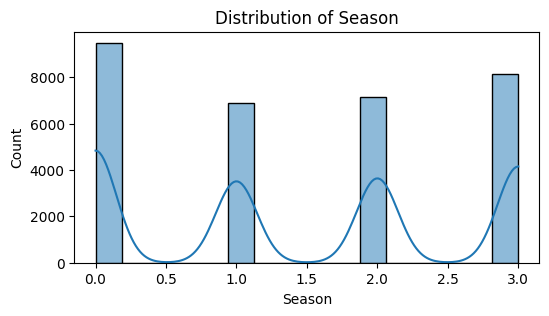

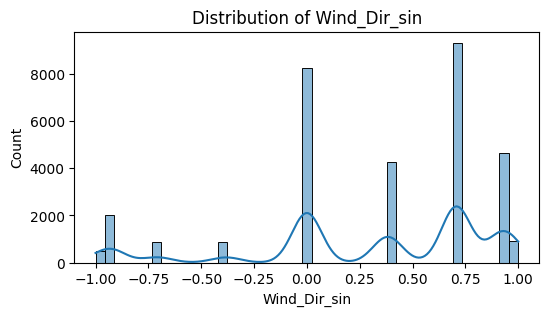

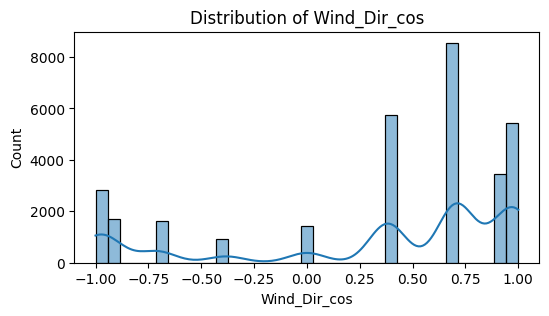

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Inspect distributions
def inspect_columns(df):
    desc = df.describe().T
    # Calculate skewness and kurtosis separately
    desc['skew'] = df.skew()
    desc['kurt'] = df.kurtosis()
    print(desc[['mean', 'std', 'min', 'max', 'skew', 'kurt']])
    for col in df.columns:
        plt.figure(figsize=(6, 3))
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()

# Calculate skew and kurtosis
def add_skew_kurt(df):
    df_stats = df.describe().T
    df_stats['skew'] = df.skew()
    df_stats['kurt'] = df.kurtosis()
    return df_stats

print("Before Pettit")
print(add_skew_kurt(df_model_before_Pettit))
inspect_columns(df_model_before_Pettit)

print("After Pettit")
print(add_skew_kurt(df_model_after_Pettit))
inspect_columns(df_model_after_Pettit)

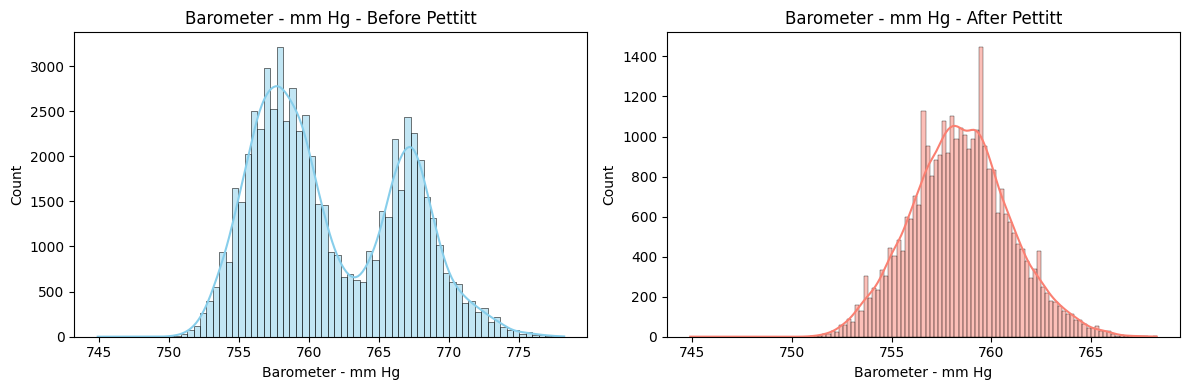

C:\Users\Alaa\AppData\Local\Temp\ipykernel_28152\4040928457.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Group", y="Value", data=temp_df, palette=["skyblue", "salmon"])


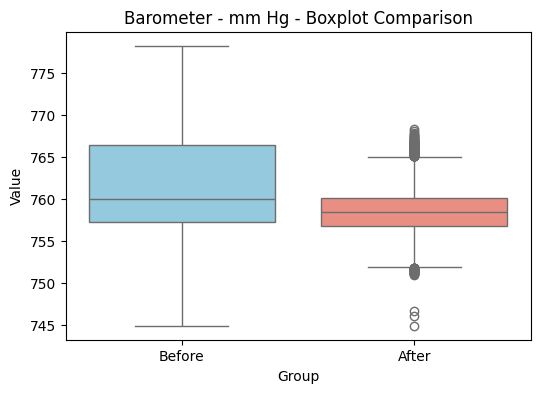

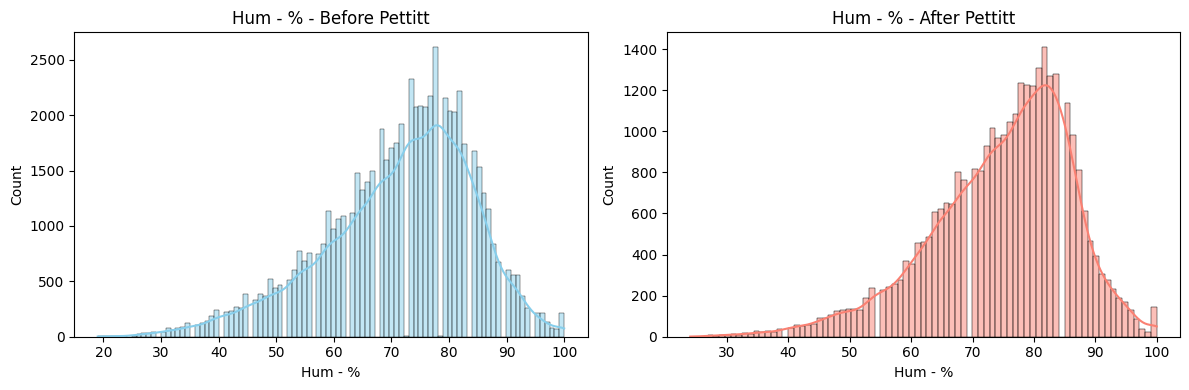

C:\Users\Alaa\AppData\Local\Temp\ipykernel_28152\4040928457.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Group", y="Value", data=temp_df, palette=["skyblue", "salmon"])


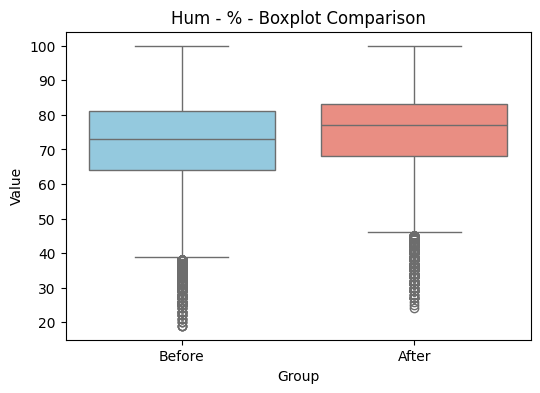

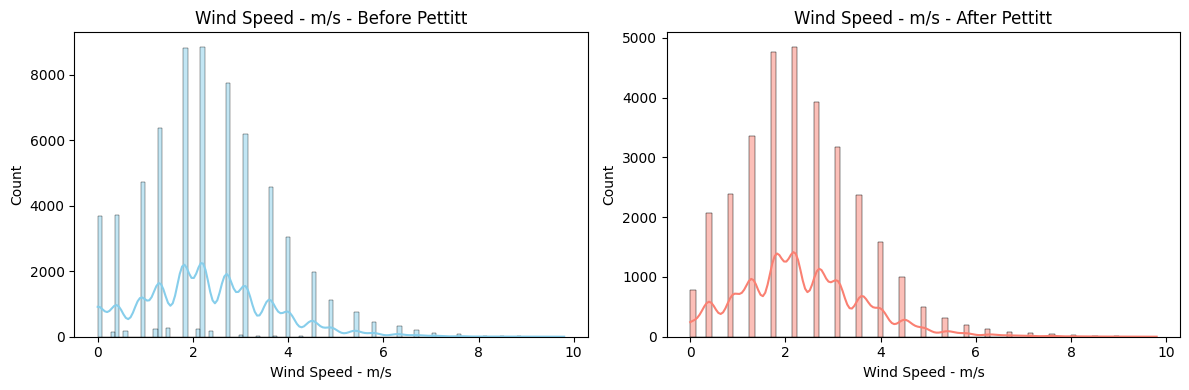

C:\Users\Alaa\AppData\Local\Temp\ipykernel_28152\4040928457.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Group", y="Value", data=temp_df, palette=["skyblue", "salmon"])


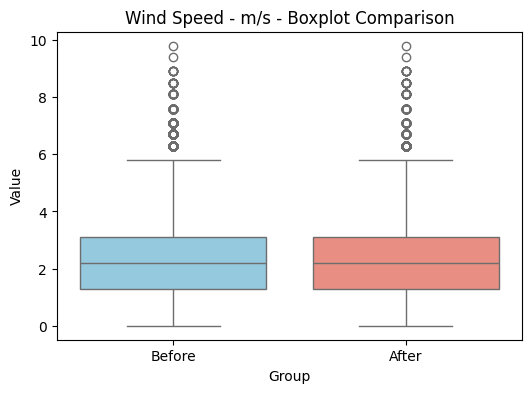

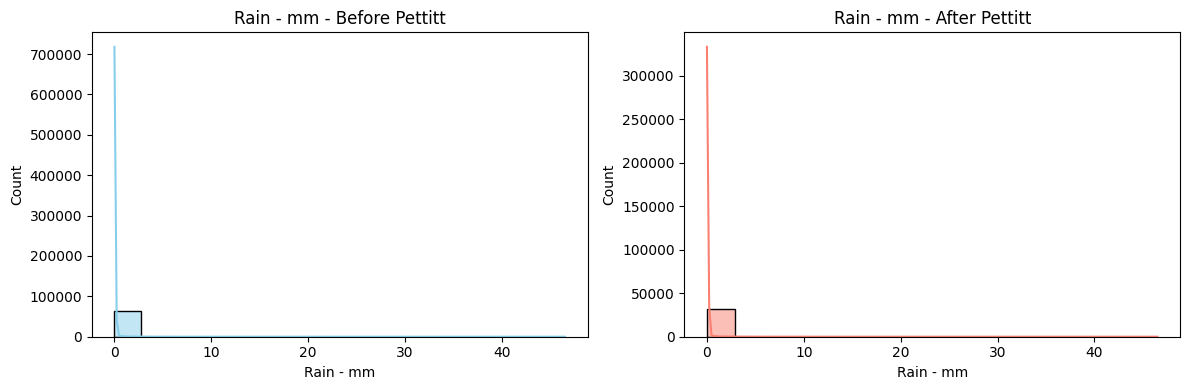

C:\Users\Alaa\AppData\Local\Temp\ipykernel_28152\4040928457.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Group", y="Value", data=temp_df, palette=["skyblue", "salmon"])


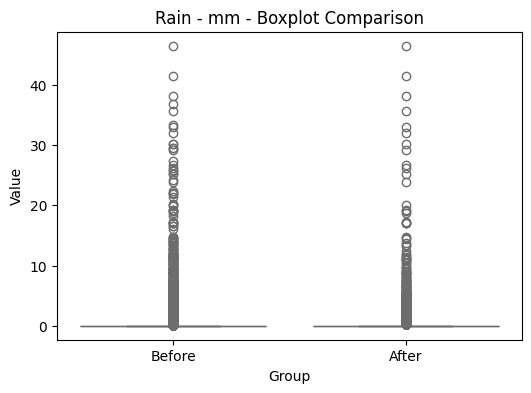

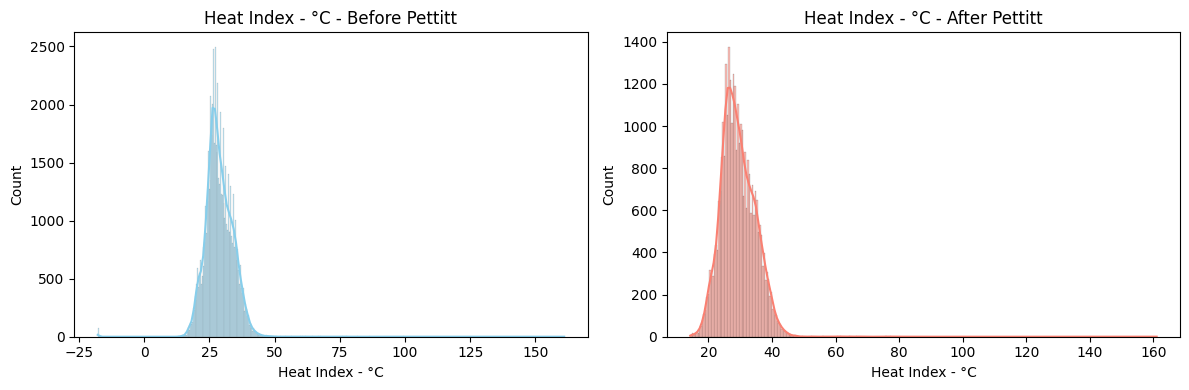

C:\Users\Alaa\AppData\Local\Temp\ipykernel_28152\4040928457.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Group", y="Value", data=temp_df, palette=["skyblue", "salmon"])


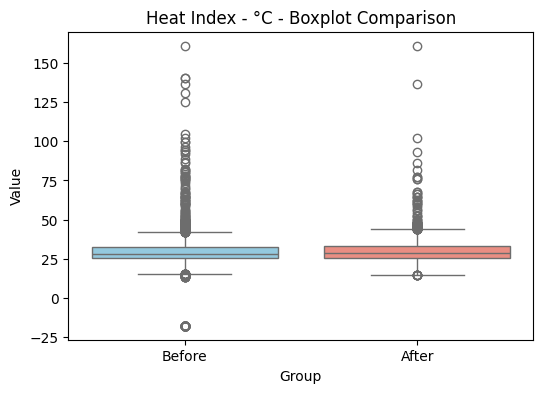

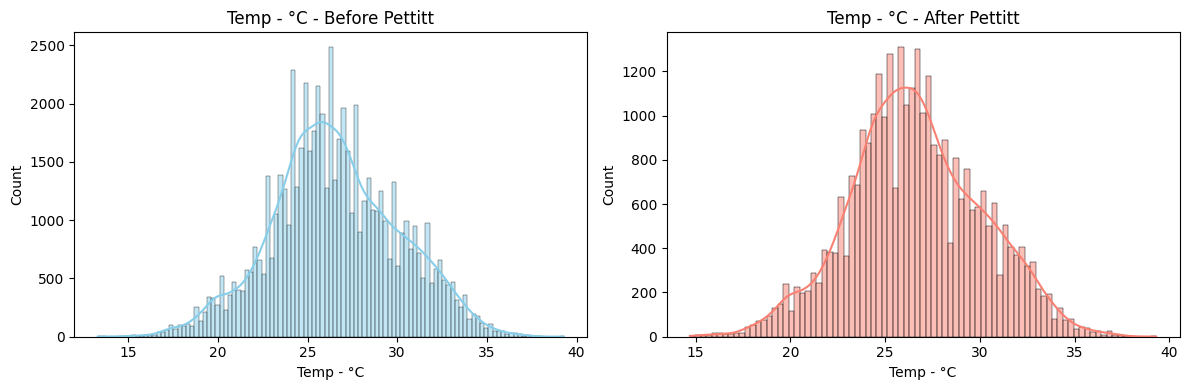

C:\Users\Alaa\AppData\Local\Temp\ipykernel_28152\4040928457.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Group", y="Value", data=temp_df, palette=["skyblue", "salmon"])


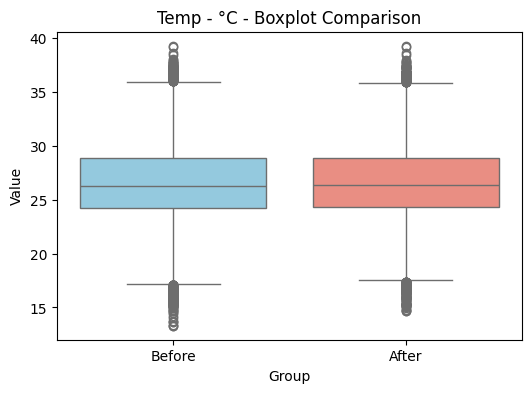

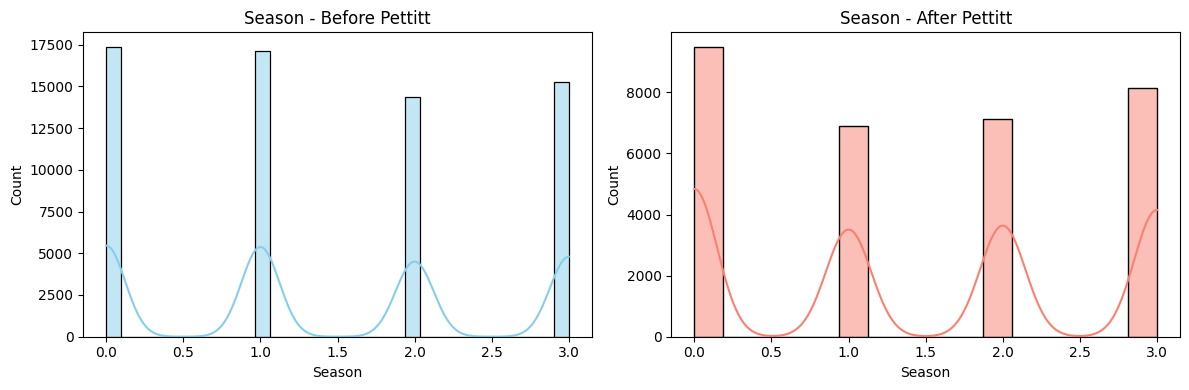

C:\Users\Alaa\AppData\Local\Temp\ipykernel_28152\4040928457.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Group", y="Value", data=temp_df, palette=["skyblue", "salmon"])


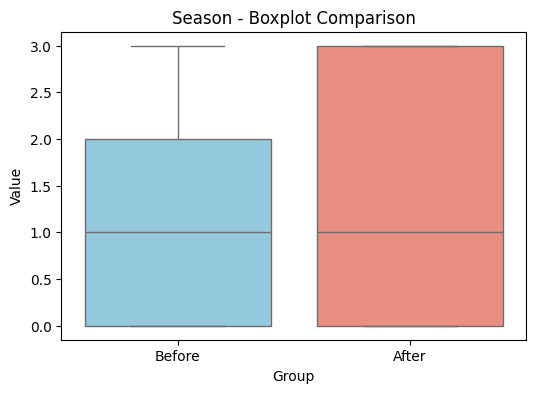

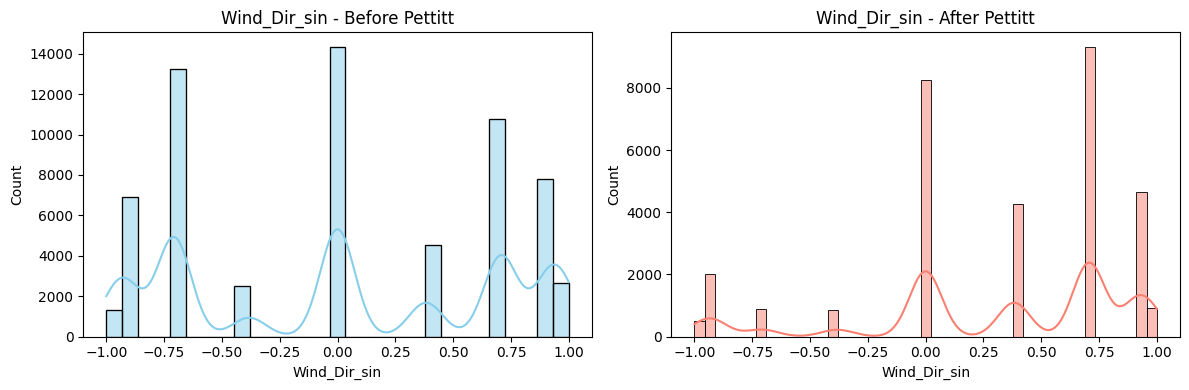

C:\Users\Alaa\AppData\Local\Temp\ipykernel_28152\4040928457.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Group", y="Value", data=temp_df, palette=["skyblue", "salmon"])


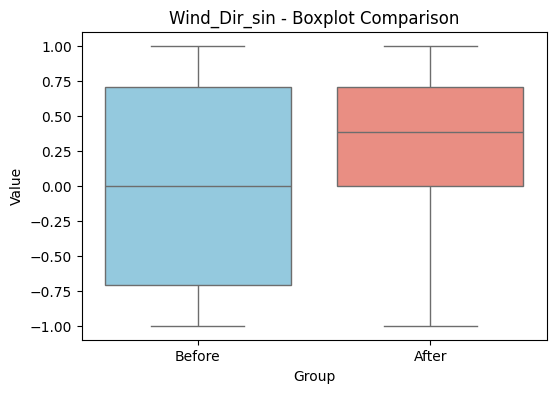

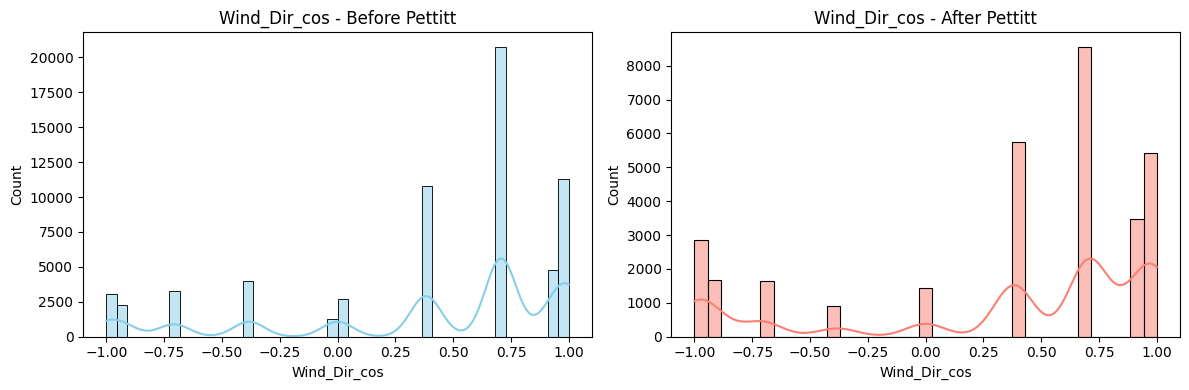

C:\Users\Alaa\AppData\Local\Temp\ipykernel_28152\4040928457.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Group", y="Value", data=temp_df, palette=["skyblue", "salmon"])


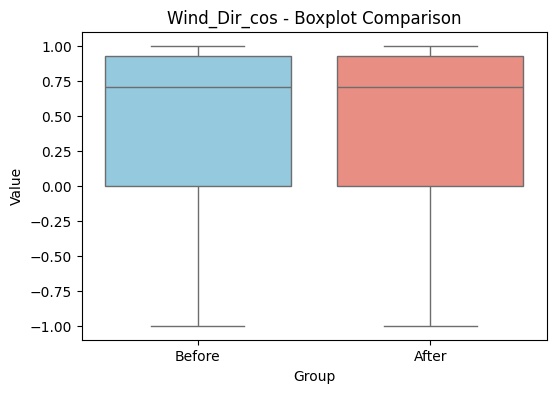

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def compare_before_after(df_before, df_after):
    for col in df_before.columns:
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        
        # Histogram Before Pettitt
        sns.histplot(df_before[col], kde=True, ax=axes[0], color="skyblue")
        axes[0].set_title(f"{col} - Before Pettitt")
        
        # Histogram After Pettitt
        sns.histplot(df_after[col], kde=True, ax=axes[1], color="salmon")
        axes[1].set_title(f"{col} - After Pettitt")
        
        plt.tight_layout()
        plt.show()
        
        # ✅ Boxplot comparison
        temp_df = pd.DataFrame({
            "Value": pd.concat([df_before[col], df_after[col]], ignore_index=True),
            "Group": (["Before"] * len(df_before)) + (["After"] * len(df_after))
        })
        
        plt.figure(figsize=(6,4))
        sns.boxplot(x="Group", y="Value", data=temp_df, palette=["skyblue", "salmon"])
        plt.title(f"{col} - Boxplot Comparison")
        plt.show()

# Call the function
compare_before_after(df_model_before_Pettit, df_model_after_Pettit)


### Barometer - mm Hg: Handling Invalid Zero Values

This cell checks for zero values in the "Barometer - mm Hg" column.  
Since a zero reading is not physically plausible for barometric pressure, these values are considered invalid.  
We replace 0s with NaN and then impute them using the median of the column.

In [68]:
barometer_col = 'Barometer - mm Hg'
for df in [df_model_before_Pettit, df_model_after_Pettit]:
    zero_mask = df[barometer_col] == 0
    print(f"Zero values found: {zero_mask.sum()} in {df.shape[0]} rows")
    # If 0 is not valid, replace with NaN and impute
    df.loc[zero_mask, barometer_col] = np.nan
    df[barometer_col].fillna(df[barometer_col].median(), inplace=True)

Zero values found: 0 in 64080 rows
Zero values found: 0 in 31661 rows


C:\Users\Alaa\AppData\Local\Temp\ipykernel_28152\722864717.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[barometer_col].fillna(df[barometer_col].median(), inplace=True)
C:\Users\Alaa\AppData\Local\Temp\ipykernel_28152\722864717.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

### Rain - mm: Log Transformation

This cell applies a log transformation (`np.log1p`) to the "Rain - mm" column in both dataframes (`df_model_before_Pettit` and `df_model_after_Pettit`).  
The log transformation helps reduce extreme right skewness and the impact of outliers, making the feature more suitable for modeling.

In [69]:
skewed_cols = ['Rain - mm']
for col in skewed_cols:
    df_model_before_Pettit[col] = np.log1p(df_model_before_Pettit[col])
    df_model_after_Pettit[col] = np.log1p(df_model_after_Pettit[col])

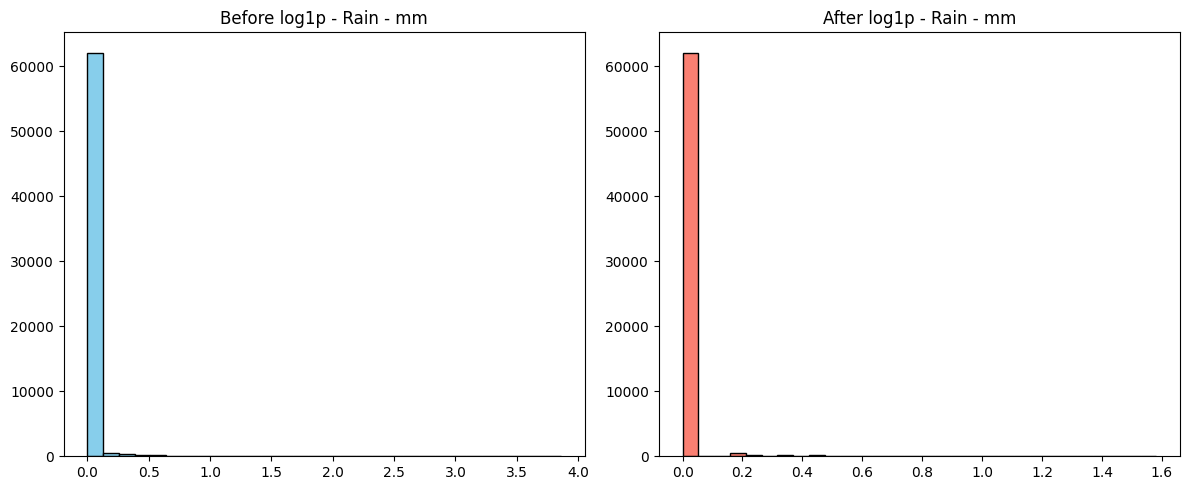

In [70]:
import matplotlib.pyplot as plt
import numpy as np

col = 'Rain - mm'

fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Before transformation
axes[0].hist(df_model_before_Pettit[col], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title(f"Before log1p - {col}")

# After transformation
axes[1].hist(np.log1p(df_model_before_Pettit[col]), bins=30, color='salmon', edgecolor='black')
axes[1].set_title(f"After log1p - {col}")

plt.tight_layout()
plt.show()


***Handling Negative Heat Index Values***

We found 73 records with a constant value of -17.8°C in the Heat Index column.

The Heat Index should not take such negative values, so this indicates an error or placeholder.

Keeping them would affect transformations like log1p.

We replaced them with NaN and applied linear interpolation to preserve data continuity.

👉 Final: -17.8°C values were treated as invalid and corrected.

In [71]:
print(df_model_before_Pettit['Heat Index - °C'].min())

-17.8


In [72]:
print(df_model_before_Pettit[df_model_before_Pettit['Heat Index - °C'] <= 0]['Heat Index - °C'].unique())
print(df_model_after_Pettit[df_model_after_Pettit['Heat Index - °C'] <= 0]['Heat Index - °C'].unique())

[-17.8]
[]


In [73]:
print(df_model_before_Pettit[df_model_before_Pettit['Heat Index - °C'] <= 0]['Heat Index - °C'])

23496   -17.8
23522   -17.8
23534   -17.8
23577   -17.8
23581   -17.8
         ... 
24811   -17.8
24861   -17.8
24897   -17.8
24933   -17.8
25011   -17.8
Name: Heat Index - °C, Length: 73, dtype: float64


In [74]:
df_model_before_Pettit['Heat Index - °C'] = df_model_before_Pettit['Heat Index - °C'].replace(-17.8, np.nan)
df_model_before_Pettit['Heat Index - °C'] = df_model_before_Pettit['Heat Index - °C'].interpolate(method='linear')

### Heat Index - °C: Log Transformation (After Pettit)

This cell applies a log transformation (`np.log1p`) to the "Heat Index - °C" column in the "After Pettit" dataframe.  
This is optional and targets moderate skewness in this feature, which can help improve model performance.

In [75]:
df_model_before_Pettit['Heat Index - °C'] = np.log1p(df_model_before_Pettit['Heat Index - °C'])
df_model_after_Pettit['Heat Index - °C'] = np.log1p(df_model_after_Pettit['Heat Index - °C'])

In [76]:
df_model_before_Pettit.to_csv("df_model_before_Pettit.csv", index=False)
df_model_after_Pettit.to_csv("df_model_after_Pettit.csv", index=False)

In [77]:
print("Missing values in df_model_before_Pettit:")
print(df_model_before_Pettit.isna().sum())

print("Missing values in df_model_after_Pettit:")
print(df_model_after_Pettit.isna().sum())   


Missing values in df_model_before_Pettit:
Barometer - mm Hg    0
Hum - %              0
Wind Speed - m/s     0
Rain - mm            0
Heat Index - °C      0
Temp - °C            0
Season               0
Wind_Dir_sin         0
Wind_Dir_cos         0
dtype: int64
Missing values in df_model_after_Pettit:
Barometer - mm Hg    0
Hum - %              0
Wind Speed - m/s     0
Rain - mm            0
Heat Index - °C      0
Temp - °C            0
Season               0
Wind_Dir_sin         0
Wind_Dir_cos         0
dtype: int64


### Train-Test Split

In [78]:
from sklearn.model_selection import train_test_split

X_before = df_model_before_Pettit.drop('Temp - °C', axis=1)
y_before = df_model_before_Pettit['Temp - °C']

X_after = df_model_after_Pettit.drop('Temp - °C', axis=1)
y_after = df_model_after_Pettit['Temp - °C']

X_train_before, X_test_before, y_train_before, y_test_before = train_test_split( X_before, y_before, test_size=0.2, random_state=42 ) 
X_train_after, X_test_after, y_train_after, y_test_after = train_test_split( X_after, y_after, test_size=0.2, random_state=42 )



# LINEAR REGRESSION

This section presents the results and analysis of linear regression models applied to the weather dataset, both **before** and **after** the Pettitt change point.  
We compare model performance, feature importance, and the impact of data segmentation on predictive accuracy for temperature.

---

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# ---------------- Linear Regression for BEFORE ----------------
linreg_before = LinearRegression()
linreg_before.fit(X_train_before, y_train_before)

y_pred_before = linreg_before.predict(X_test_before)

r2_before = r2_score(y_test_before, y_pred_before)
rmse_before = np.sqrt(mean_squared_error(y_test_before, y_pred_before))
mae_before = mean_absolute_error(y_test_before, y_pred_before)

print("----- Before Pettit -----")
print(f"R²: {r2_before:.4f}")
print(f"RMSE: {rmse_before:.4f}")
print(f"MAE: {mae_before:.4f}")

# ---------------- Linear Regression for AFTER ----------------
linreg_after = LinearRegression()
linreg_after.fit(X_train_after, y_train_after)

y_pred_after = linreg_after.predict(X_test_after)

r2_after = r2_score(y_test_after, y_pred_after)
rmse_after = np.sqrt(mean_squared_error(y_test_after, y_pred_after))
mae_after = mean_absolute_error(y_test_after, y_pred_after)

print("\n----- After Pettit -----")
print(f"R²: {r2_after:.4f}")
print(f"RMSE: {rmse_after:.4f}")
print(f"MAE: {mae_after:.4f}")


----- Before Pettit -----
R²: 0.9786
RMSE: 0.5201
MAE: 0.3171

----- After Pettit -----
R²: 0.9856
RMSE: 0.4198
MAE: 0.2937


In [80]:
# ---------------- Check Overfitting (Train vs Test) ----------------
def evaluate_model(model, X_train, y_train, X_test, y_test, label="Model"):
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metrics for train
    r2_train = r2_score(y_train, y_train_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    mae_train = mean_absolute_error(y_train, y_train_pred)

    # Metrics for test
    r2_test = r2_score(y_test, y_test_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mae_test = mean_absolute_error(y_test, y_test_pred)

    print(f"\n----- {label} -----")
    print("Train:")
    print(f"  R²:   {r2_train:.4f}")
    print(f"  RMSE: {rmse_train:.4f}")
    print(f"  MAE:  {mae_train:.4f}")

    print("Test:")
    print(f"  R²:   {r2_test:.4f}")
    print(f"  RMSE: {rmse_test:.4f}")
    print(f"  MAE:  {mae_test:.4f}")

# Evaluate both models
evaluate_model(linreg_before, X_train_before, y_train_before, X_test_before, y_test_before, "Before Pettit")
evaluate_model(linreg_after, X_train_after, y_train_after, X_test_after, y_test_after, "After Pettit")



----- Before Pettit -----
Train:
  R²:   0.9795
  RMSE: 0.5089
  MAE:  0.3190
Test:
  R²:   0.9786
  RMSE: 0.5201
  MAE:  0.3171

----- After Pettit -----
Train:
  R²:   0.9821
  RMSE: 0.4665
  MAE:  0.2977
Test:
  R²:   0.9856
  RMSE: 0.4198
  MAE:  0.2937


### Effect of Standardization on Linear Regression

To check the impact of feature scaling, we compared the model performance **with and without Standardization** for both periods (Before and After Pettit test).  

As expected, **Linear Regression performance did not change drastically** with scaling, because this algorithm is not sensitive to feature magnitudes (unlike distance-based methods such as KNN or SVM).  
The only difference scaling makes in this case is in the interpretation of coefficients, not in predictive accuracy.  

✅ Moreover, the results show **no signs of overfitting**:  
- Train and Test scores are very close.  
- After Pettit, the Test performance is even slightly better, which indicates cleaner data rather than overfitting.  

📊 **Comparison Before vs After Pettit:**  
- After Pettit, all error metrics (RMSE, MAE) decreased and R² improved.  
- This suggests that applying Pettit segmentation led to a more stable and better-fitting model.  


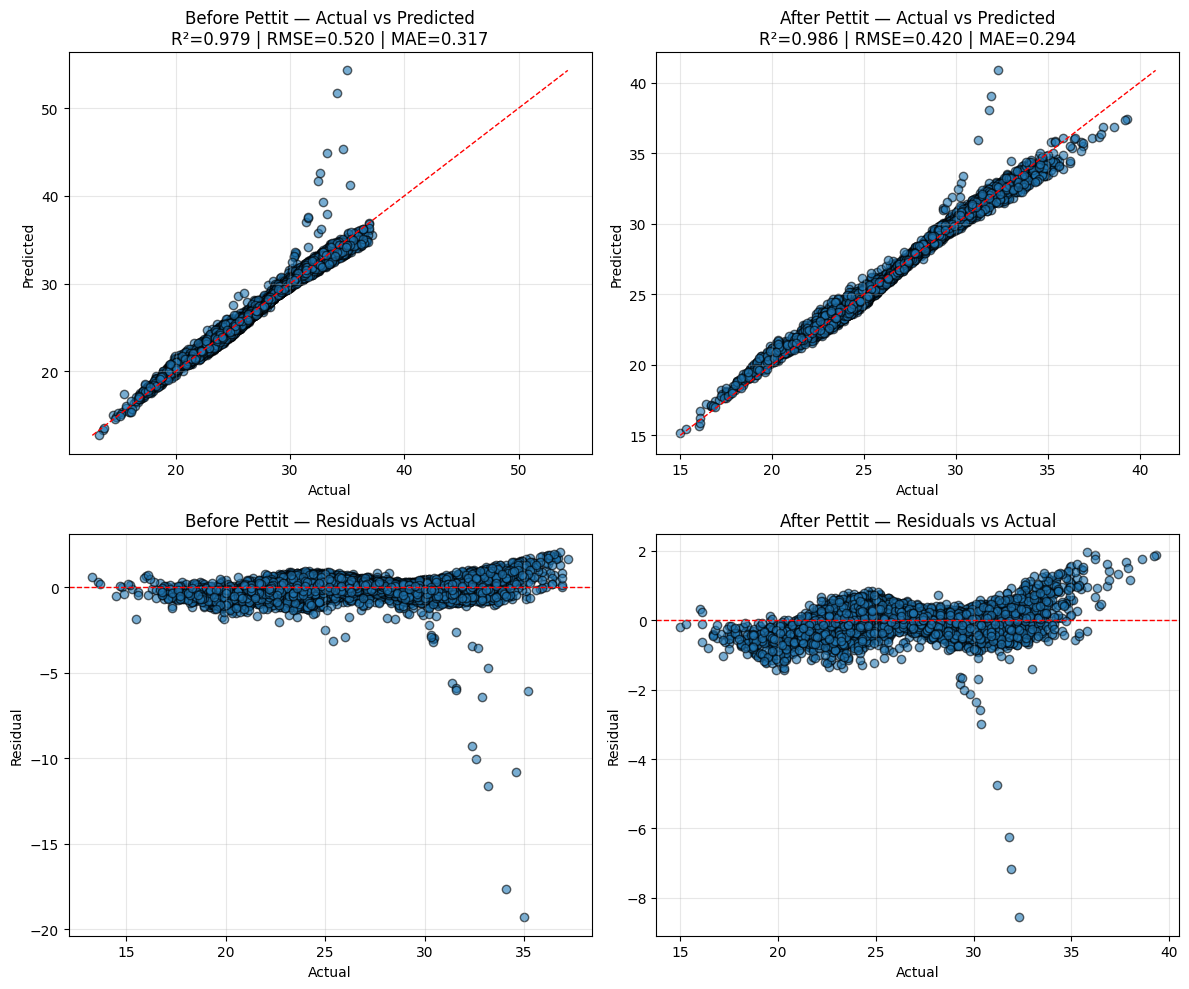

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def compare_models_plots(y_true_before, y_pred_before, y_true_after, y_pred_after):
    residuals_before = y_true_before - y_pred_before
    residuals_after  = y_true_after - y_pred_after

    # metrics
    def metrics(y_true, y_pred):
        return r2_score(y_true, y_pred), np.sqrt(mean_squared_error(y_true, y_pred)), mean_absolute_error(y_true, y_pred)

    r2_b, rmse_b, mae_b = metrics(y_true_before, y_pred_before)
    r2_a, rmse_a, mae_a = metrics(y_true_after, y_pred_after)

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # ----- Actual vs Predicted (Before)
    axes[0,0].scatter(y_true_before, y_pred_before, alpha=0.6, edgecolor='k')
    lims = [min(y_true_before.min(), y_pred_before.min()), max(y_true_before.max(), y_pred_before.max())]
    axes[0,0].plot(lims, lims, 'r--', linewidth=1)
    axes[0,0].set_title(f"Before Pettit — Actual vs Predicted\nR²={r2_b:.3f} | RMSE={rmse_b:.3f} | MAE={mae_b:.3f}")
    axes[0,0].set_xlabel("Actual")
    axes[0,0].set_ylabel("Predicted")
    axes[0,0].grid(True, alpha=0.3)

    # ----- Actual vs Predicted (After)
    axes[0,1].scatter(y_true_after, y_pred_after, alpha=0.6, edgecolor='k')
    lims = [min(y_true_after.min(), y_pred_after.min()), max(y_true_after.max(), y_pred_after.max())]
    axes[0,1].plot(lims, lims, 'r--', linewidth=1)
    axes[0,1].set_title(f"After Pettit — Actual vs Predicted\nR²={r2_a:.3f} | RMSE={rmse_a:.3f} | MAE={mae_a:.3f}")
    axes[0,1].set_xlabel("Actual")
    axes[0,1].set_ylabel("Predicted")
    axes[0,1].grid(True, alpha=0.3)

    # ----- Residuals vs Actual (Before)
    axes[1,0].scatter(y_true_before, residuals_before, alpha=0.6, edgecolor='k')
    axes[1,0].axhline(0, color='r', linestyle='--', linewidth=1)
    axes[1,0].set_title("Before Pettit — Residuals vs Actual")
    axes[1,0].set_xlabel("Actual")
    axes[1,0].set_ylabel("Residual")
    axes[1,0].grid(True, alpha=0.3)

    # ----- Residuals vs Actual (After)
    axes[1,1].scatter(y_true_after, residuals_after, alpha=0.6, edgecolor='k')
    axes[1,1].axhline(0, color='r', linestyle='--', linewidth=1)
    axes[1,1].set_title("After Pettit — Residuals vs Actual")
    axes[1,1].set_xlabel("Actual")
    axes[1,1].set_ylabel("Residual")
    axes[1,1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# ---- usage example ----
y_pred_before = linreg_before.predict(X_test_before)
y_pred_after  = linreg_after.predict(X_test_after)

compare_models_plots(y_test_before.values, y_pred_before,
                     y_test_after.values,  y_pred_after)


# Model Performance Summary: Before vs After Pettit Test

## Purpose
Compare predictive model performance before and after a Pettit test–identified change point.

## Performance Metrics

| Period | R²   | RMSE  | MAE   |
|--------|------|-------|-------|
| Before | 0.979 | 0.520 | 0.317 |
| After  | 0.986 | 0.420 | 0.294 |

## Key Findings
- **After Pettit model is more accurate**: higher R², lower RMSE and MAE.  
- Residuals are more stable and centered post-change.  
- Pre-change data shows more scatter and outliers, indicating less stable patterns.

## Conclusions
- Pettit test effectively detected a structural change.  
- Post-change period exhibits more predictable behavior.  
- Post-Pettit model is preferable for forecasting if the change is permanent.



===== FEATURE IMPORTANCE: BEFORE Pettit =====


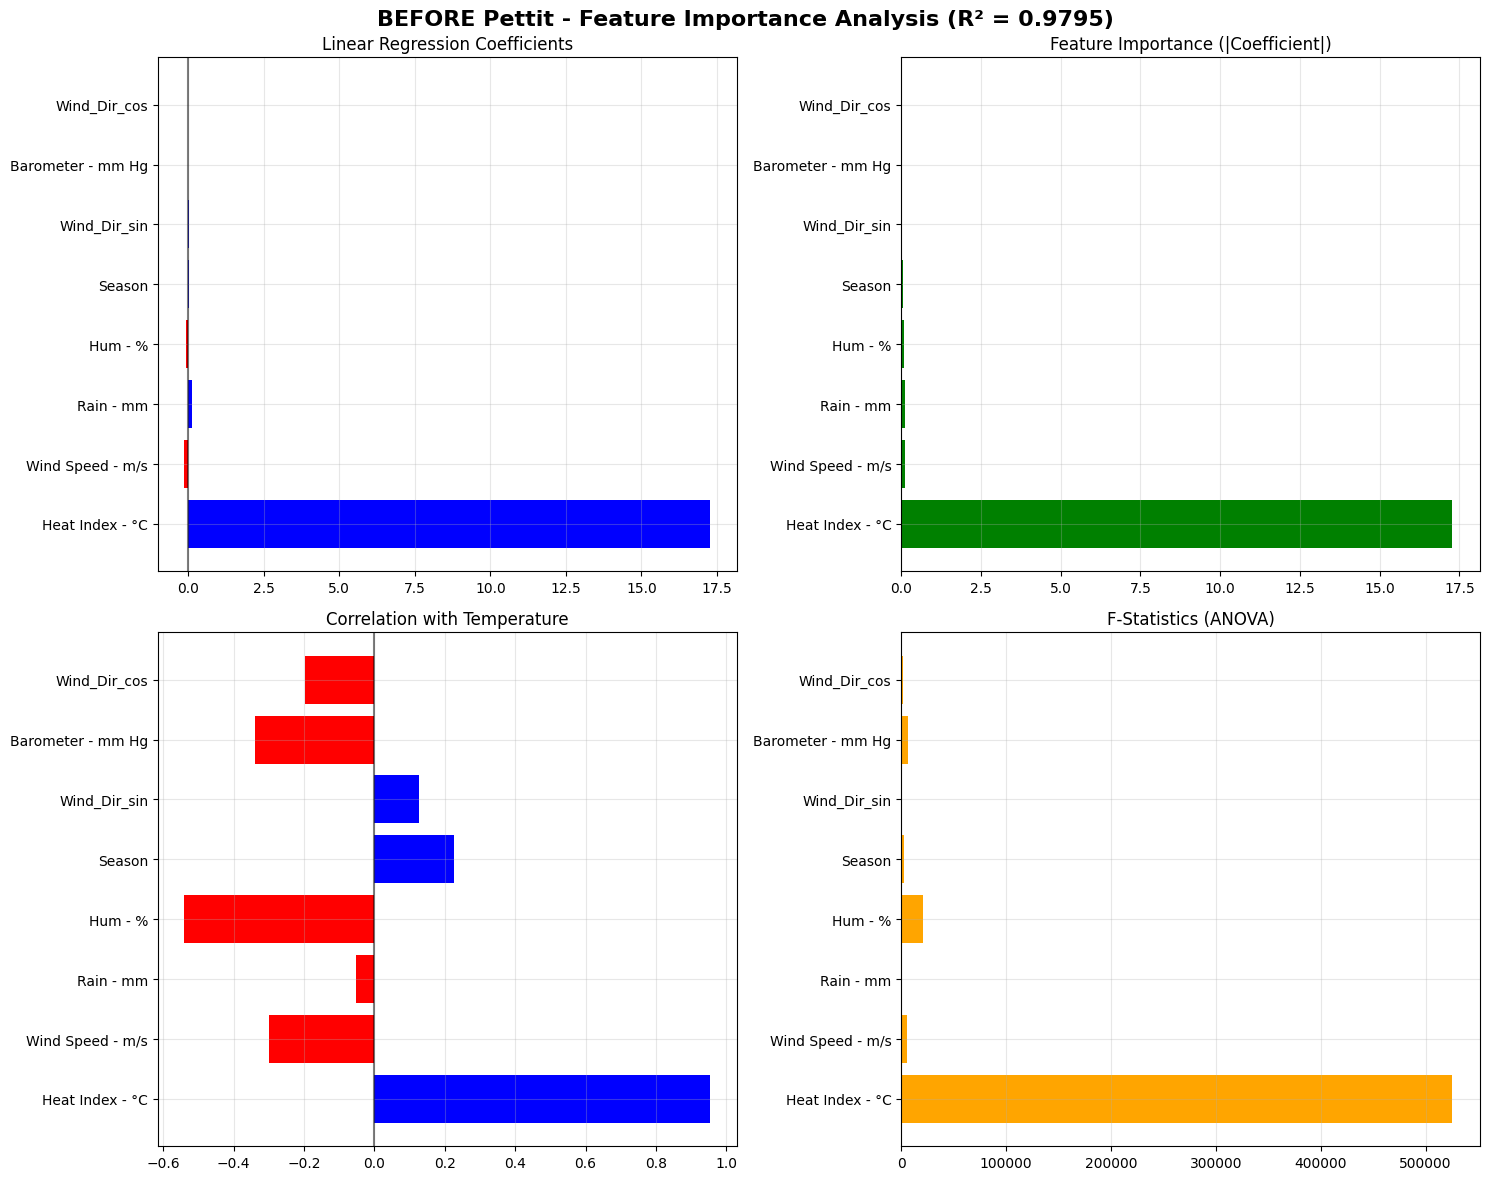


===== FEATURE IMPORTANCE: AFTER Pettit =====


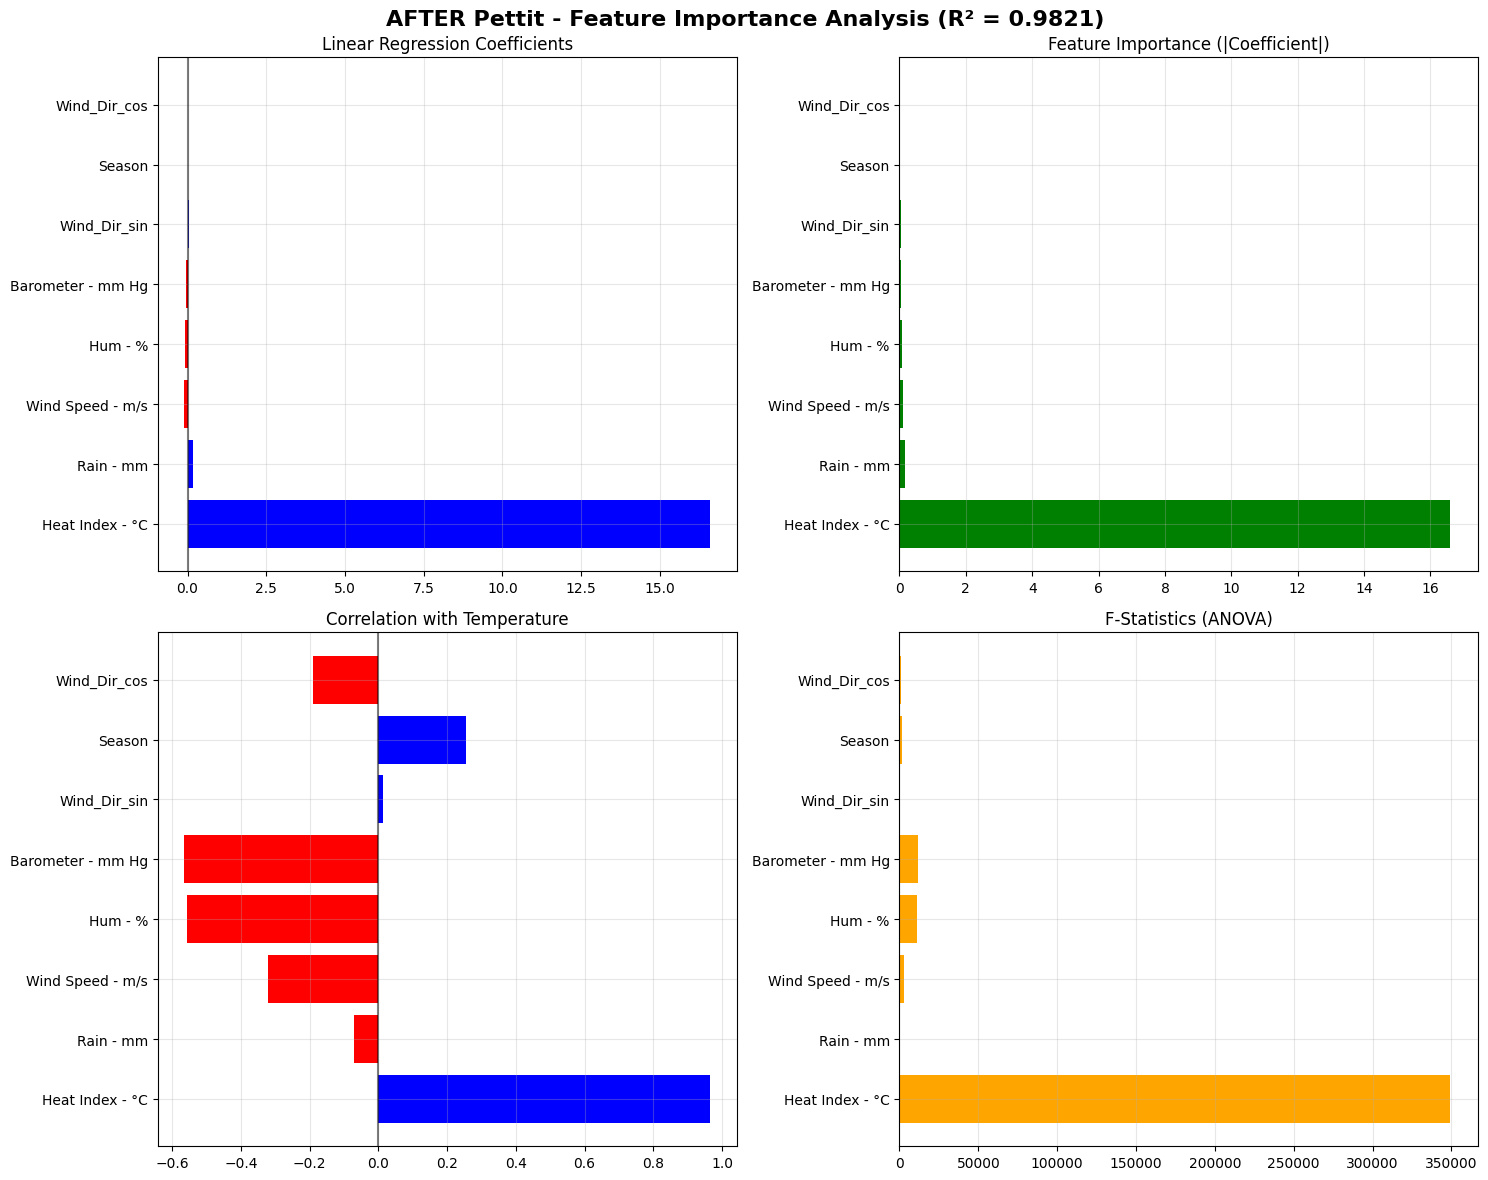


===== DIRECT COMPARISON =====
Model R² Improvement: 0.9795 → 0.9821 (Δ = 0.0026)

Top Features with INCREASED importance:
                             Feature  Importance_Before  Importance_After  \
Feature                                                                     
Rain - mm                  Rain - mm           0.111738          0.170627   
Barometer - mm Hg  Barometer - mm Hg           0.013282          0.055632   
Wind_Dir_sin            Wind_Dir_cos           0.033717          0.051796   

                   Importance_Change    Change_%  
Feature                                           
Rain - mm                   0.058889   52.703026  
Barometer - mm Hg           0.042349  318.835038  
Wind_Dir_sin                0.018079   53.618715  

Top Features with DECREASED importance:
                          Feature  Importance_Before  Importance_After  \
Feature                                                                  
Season            Heat Index - °C           0.0

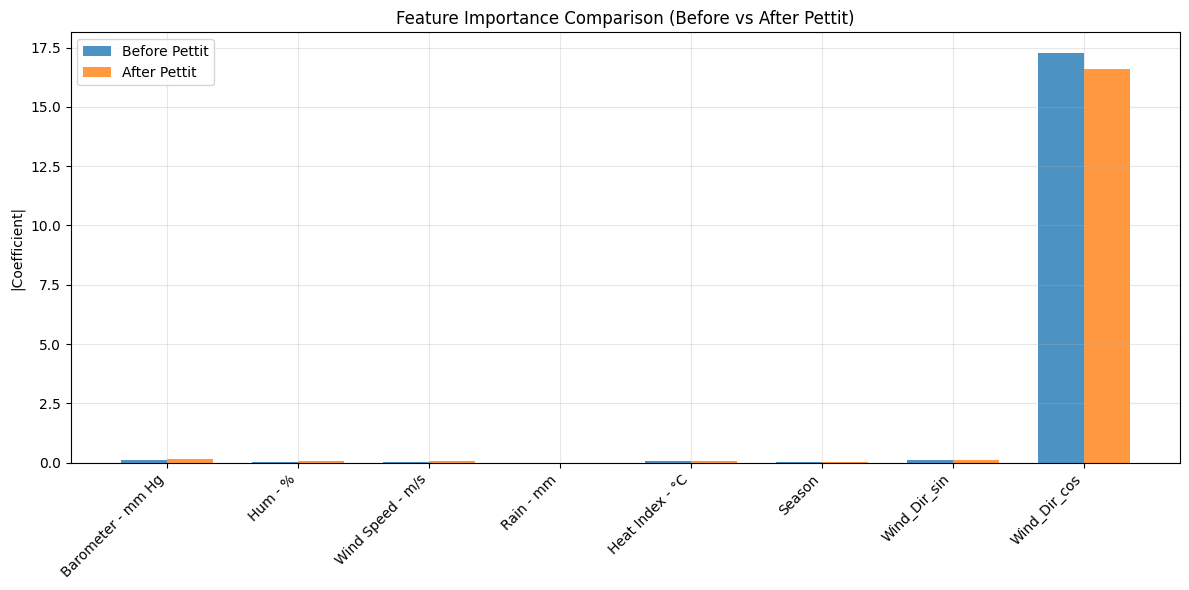

In [82]:
# ====== FEATURE IMPORTANCE ANALYSIS (Before vs After Pettit) ======
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from scipy.stats import pearsonr
from sklearn.metrics import r2_score

def analyze_feature_importance(X, y, feature_names, title="Feature Importance Analysis"):
    """
    Comprehensive feature importance analysis for linear regression
    """
    # 1. Linear Regression Coefficients
    model = LinearRegression()
    model.fit(X, y)
    coefficients = model.coef_
    r2 = r2_score(y, model.predict(X))
    
    # 2. Correlation Analysis
    correlations, p_values = [], []
    for i in range(X.shape[1]):
        corr, p_val = pearsonr(X[:, i], y)
        correlations.append(corr)
        p_values.append(p_val)
    
    # 3. F-statistics (ANOVA F-test)
    selector = SelectKBest(score_func=f_regression, k='all')
    selector.fit(X, y)
    f_scores = selector.scores_
    f_pvalues = selector.pvalues_
    
    # 4. DataFrame
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients,
        'Abs_Coefficient': np.abs(coefficients),
        'Correlation': correlations,
        'Abs_Correlation': np.abs(correlations),
        'Correlation_PValue': p_values,
        'F_Score': f_scores,
        'F_PValue': f_pvalues
    }).sort_values('Abs_Coefficient', ascending=False)
    
    # 5. Visualization
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle(f'{title} - Feature Importance Analysis (R² = {r2:.4f})',
                 fontsize=16, fontweight='bold')
    
    # Coefficients
    colors = ['red' if x < 0 else 'blue' for x in importance_df['Coefficient']]
    axes[0,0].barh(importance_df['Feature'], importance_df['Coefficient'], color=colors)
    axes[0,0].set_title('Linear Regression Coefficients')
    axes[0,0].grid(True, alpha=0.3)
    axes[0,0].axvline(0, color='black', linestyle='-', alpha=0.5)

    # Absolute Coefficients
    axes[0,1].barh(importance_df['Feature'], importance_df['Abs_Coefficient'], color='green')
    axes[0,1].set_title('Feature Importance (|Coefficient|)')
    axes[0,1].grid(True, alpha=0.3)

    # Correlations
    corr_colors = ['red' if x < 0 else 'blue' for x in importance_df['Correlation']]
    axes[1,0].barh(importance_df['Feature'], importance_df['Correlation'], color=corr_colors)
    axes[1,0].set_title('Correlation with Temperature')
    axes[1,0].grid(True, alpha=0.3)
    axes[1,0].axvline(0, color='black', linestyle='-', alpha=0.5)

    # F-Statistics
    axes[1,1].barh(importance_df['Feature'], importance_df['F_Score'], color='orange')
    axes[1,1].set_title('F-Statistics (ANOVA)')
    axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return importance_df, r2

def compare_feature_importance_before_after(X_train_before, y_train_before,
                                            X_train_after, y_train_after,
                                            feature_names):
    """
    Compare feature importance before and after Pettit test
    """
    print("\n===== FEATURE IMPORTANCE: BEFORE Pettit =====")
    importance_before, r2_before = analyze_feature_importance(
        X_train_before.values, y_train_before.values, feature_names, "BEFORE Pettit"
    )

    print("\n===== FEATURE IMPORTANCE: AFTER Pettit =====")
    importance_after, r2_after = analyze_feature_importance(
        X_train_after.values, y_train_after.values, feature_names, "AFTER Pettit"
    )
    
    # Direct comparison
    comparison_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance_Before': importance_before.set_index('Feature')['Abs_Coefficient'],
        'Importance_After': importance_after.set_index('Feature')['Abs_Coefficient'],
    })
    
    comparison_df['Importance_Change'] = comparison_df['Importance_After'] - comparison_df['Importance_Before']
    comparison_df['Change_%'] = (comparison_df['Importance_Change'] / comparison_df['Importance_Before']) * 100
    comparison_df = comparison_df.sort_values('Importance_Change', ascending=False)
    
    print("\n===== DIRECT COMPARISON =====")
    print(f"Model R² Improvement: {r2_before:.4f} → {r2_after:.4f} "
          f"(Δ = {r2_after - r2_before:.4f})")
    
    print("\nTop Features with INCREASED importance:")
    print(comparison_df.head(3))
    
    print("\nTop Features with DECREASED importance:")
    print(comparison_df.tail(3))
    
    # Visualization
    plt.figure(figsize=(12, 6))
    x = np.arange(len(feature_names))
    width = 0.35
    plt.bar(x - width/2, comparison_df['Importance_Before'], width, label='Before Pettit', alpha=0.8)
    plt.bar(x + width/2, comparison_df['Importance_After'], width, label='After Pettit', alpha=0.8)
    plt.xticks(x, feature_names, rotation=45, ha='right')
    plt.ylabel('|Coefficient|')
    plt.title('Feature Importance Comparison (Before vs After Pettit)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    return importance_before, importance_after, comparison_df

# ==== Run with our split data ====
feature_names = X_train_before.columns.tolist()

importance_before, importance_after, comparison = compare_feature_importance_before_after(
    X_train_before, y_train_before,
    X_train_after, y_train_after,
    feature_names
)


In [83]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def calculate_vif(X):
    # add constant
    X_vif = add_constant(X)
    # calculate VIF
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X_vif.columns
    vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                       for i in range(X_vif.shape[1])]
    return vif_data

# before VIF
vif_before = calculate_vif(X_train_before)
print("VIF Before:")
print(vif_before)

# after VIF
vif_after = calculate_vif(X_train_after)
print("\nVIF After:")
print(vif_after)


VIF Before:
             Feature           VIF
0              const  37011.723889
1  Barometer - mm Hg      1.475419
2            Hum - %      1.713384
3   Wind Speed - m/s      1.510220
4          Rain - mm      1.052449
5    Heat Index - °C      2.183857
6             Season      1.322742
7       Wind_Dir_sin      1.220448
8       Wind_Dir_cos      1.163344

VIF After:
             Feature            VIF
0              const  184719.721978
1  Barometer - mm Hg       1.887742
2            Hum - %       1.680727
3   Wind Speed - m/s       1.629759
4          Rain - mm       1.050793
5    Heat Index - °C       2.362511
6             Season       1.347360
7       Wind_Dir_sin       1.259802
8       Wind_Dir_cos       1.124482


# Summary: Model Performance Analysis (Before vs After Pettit Test)

## Key Performance
| Period | R²   | RMSE  | MAE   |
|--------|------|-------|-------|
| Before | 0.9795 | 0.520 | 0.317 |
| After  | 0.9821 | 0.420 | 0.294 |
| **Improvement** | **+0.0026** | **-0.100** | **-0.023** |

- **After Pettit model performs slightly better**: higher R², lower RMSE and MAE.  
- Residuals are more stable and centered post-change.  

## Feature Importance Changes
- **Heat Index** remains the dominant predictor in both periods.  
- **Increased importance**:  
  - Barometric Pressure (+318.8%)  
  - Rainfall (+52.7%)  
  - Wind Direction (+53.6%)  
- **Decreased importance**:  
  - Season (-39.5%)  
  - Wind Speed (-19.4%)  
  - Heat Index (-3.9%)  

## Key Insights
1. **Structural Change Impact**: Pettit test detected a meaningful shift, improving model accuracy modestly.  
2. **Meteorological Regime Shift**:  
   - Pressure and precipitation gained importance.  
   - Seasonal effects weakened → more stable year-round temperatures.  
3. **Model Stability**: Post-Pettit period shows higher accuracy, reduced residual scatter, and more predictable patterns.  
4. **Multicollinearity**: All predictors have **VIF < 5**, so no serious multicollinearity issues; Heat Index shows the highest (~2.3) but still acceptable.  
5. **Heat Index** remains the core driver of temperature prediction.  



In [84]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Helper function to train & evaluate polynomial regression
def polynomial_regression(X_train, X_test, y_train, y_test, degrees=[2,3,4,5]):
    results = []
    for d in degrees:
        # 1️⃣ Generate polynomial features
        poly = PolynomialFeatures(degree=d)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        # 2️⃣ Train model
        model = LinearRegression()
        model.fit(X_train_poly, y_train)

        # 3️⃣ Predict
        y_pred = model.predict(X_test_poly)

        # 4️⃣ Evaluate
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        results.append({
            "Degree": d,
            "RMSE": rmse,
            "MAE": mae,
            "R²": r2
        })

    df = pd.DataFrame(results)
    # select the best based on highest R²
    best = df.loc[df["R²"].idxmax()]
    return df, best

# --------- 🔹 Run on Before Pettit ---------
print("=== Polynomial Regression (Before Pettit) ===")
before_df, best_before = polynomial_regression(X_train_before, X_test_before, y_train_before, y_test_before)
print(before_df)
print("\nBest Degree (Before Pettit):")
print(best_before)

# --------- 🔹 Run on After Pettit ---------
print("\n=== Polynomial Regression (After Pettit) ===")
after_df, best_after = polynomial_regression(X_train_after, X_test_after, y_train_after, y_test_after)
print(after_df)
print("\nBest Degree (After Pettit):")
print(best_after)


=== Polynomial Regression (Before Pettit) ===
   Degree      RMSE       MAE        R²
0       2  0.186695  0.128117  0.997238
1       3  0.145404  0.101230  0.998325
2       4  0.119406  0.081288  0.998870
3       5  0.122927  0.079844  0.998803

Best Degree (Before Pettit):
Degree    4.000000
RMSE      0.119406
MAE       0.081288
R²        0.998870
Name: 2, dtype: float64

=== Polynomial Regression (After Pettit) ===
   Degree      RMSE       MAE        R²
0       2  0.152593  0.110131  0.998099
1       3  0.112040  0.083488  0.998975
2       4  0.086368  0.062367  0.999391
3       5  0.115299  0.059147  0.998914

Best Degree (After Pettit):
Degree    4.000000
RMSE      0.086368
MAE       0.062367
R²        0.999391
Name: 2, dtype: float64


In [85]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

results = []

for degree in range(1, 6): 
    # Pipeline
    model = Pipeline([
        ("scaler", StandardScaler()),              # 1️⃣ Scaling
        ("poly", PolynomialFeatures(degree=degree, include_bias=False)),  # 2️⃣ Polynomial
        ("linreg", LinearRegression())             # 3️⃣ Linear Regression
    ])

    # Train on before data
    model.fit(X_train_before, y_train_before)
    y_pred_before = model.predict(X_test_before)
    
    r2_before = r2_score(y_test_before, y_pred_before)
    rmse_before = np.sqrt(mean_squared_error(y_test_before, y_pred_before))

    # Train on after data
    model.fit(X_train_after, y_train_after)
    y_pred_after = model.predict(X_test_after)
    
    r2_after = r2_score(y_test_after, y_pred_after)
    rmse_after = np.sqrt(mean_squared_error(y_test_after, y_pred_after))
    
    results.append([degree, r2_before, rmse_before, r2_after, rmse_after])

# Create DataFrame
df_results = pd.DataFrame(results, columns=["Degree", "R2_before", "RMSE_before", "R2_after", "RMSE_after"])
print(df_results)

# select the best based on highest R²
best_degree_before = df_results.loc[df_results["R2_before"].idxmax(), "Degree"]
best_degree_after = df_results.loc[df_results["R2_after"].idxmax(), "Degree"]

print(f"\nBest degree (before): {best_degree_before}")
print(f"Best degree (after): {best_degree_after}")


   Degree  R2_before  RMSE_before  R2_after  RMSE_after
0       1   0.978570     0.520067  0.985610    0.419791
1       2   0.997238     0.186695  0.998099    0.152593
2       3   0.998325     0.145404  0.998975    0.112033
3       4   0.998858     0.120032  0.999396    0.086008
4       5   0.998013     0.158370  0.997909    0.160026

Best degree (before): 4
Best degree (after): 4


In [86]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
import pandas as pd

def check_overfitting(X_train, X_test, y_train, y_test, max_degree=5, threshold=0.05):
    """
    Checks overfitting for polynomial regression up to max_degree.
    threshold: the R² difference between train and test considered as overfit
    """
    results = []

    for degree in range(1, max_degree+1):
        model = Pipeline([
            ("scaler", StandardScaler()),
            ("poly", PolynomialFeatures(degree=degree, include_bias=False)),
            ("linreg", LinearRegression())
        ])

        # Fit on training
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)
        diff = r2_train - r2_test
        overfit_flag = diff > threshold

        results.append({
            "Degree": degree,
            "R2_Train": r2_train,
            "R2_Test": r2_test,
            "R2_Diff": diff,
            "Overfit": overfit_flag
        })

    df_results = pd.DataFrame(results)
    return df_results

# Example usage:
df_overfit_before = check_overfitting(X_train_before, X_test_before, y_train_before, y_test_before)
df_overfit_after = check_overfitting(X_train_after, X_test_after, y_train_after, y_test_after)

print("Overfitting Check - Before Pettit")
print(df_overfit_before)
print("\nOverfitting Check - After Pettit")
print(df_overfit_after)


Overfitting Check - Before Pettit
   Degree  R2_Train   R2_Test   R2_Diff  Overfit
0       1  0.979514  0.978570  0.000944    False
1       2  0.997491  0.997238  0.000253    False
2       3  0.998552  0.998325  0.000227    False
3       4  0.999131  0.998858  0.000273    False
4       5  0.999294  0.998013  0.001281    False

Overfitting Check - After Pettit
   Degree  R2_Train   R2_Test   R2_Diff  Overfit
0       1  0.982130  0.985610 -0.003480    False
1       2  0.998029  0.998099 -0.000069    False
2       3  0.998979  0.998975  0.000004    False
3       4  0.999465  0.999396  0.000069    False
4       5  0.999612  0.997909  0.001703    False


=== Before Pettit ===
R²: 0.9989, RMSE: 0.1200, MAE: 0.0807

=== After Pettit ===
R²: 0.9994, RMSE: 0.0860, MAE: 0.0621


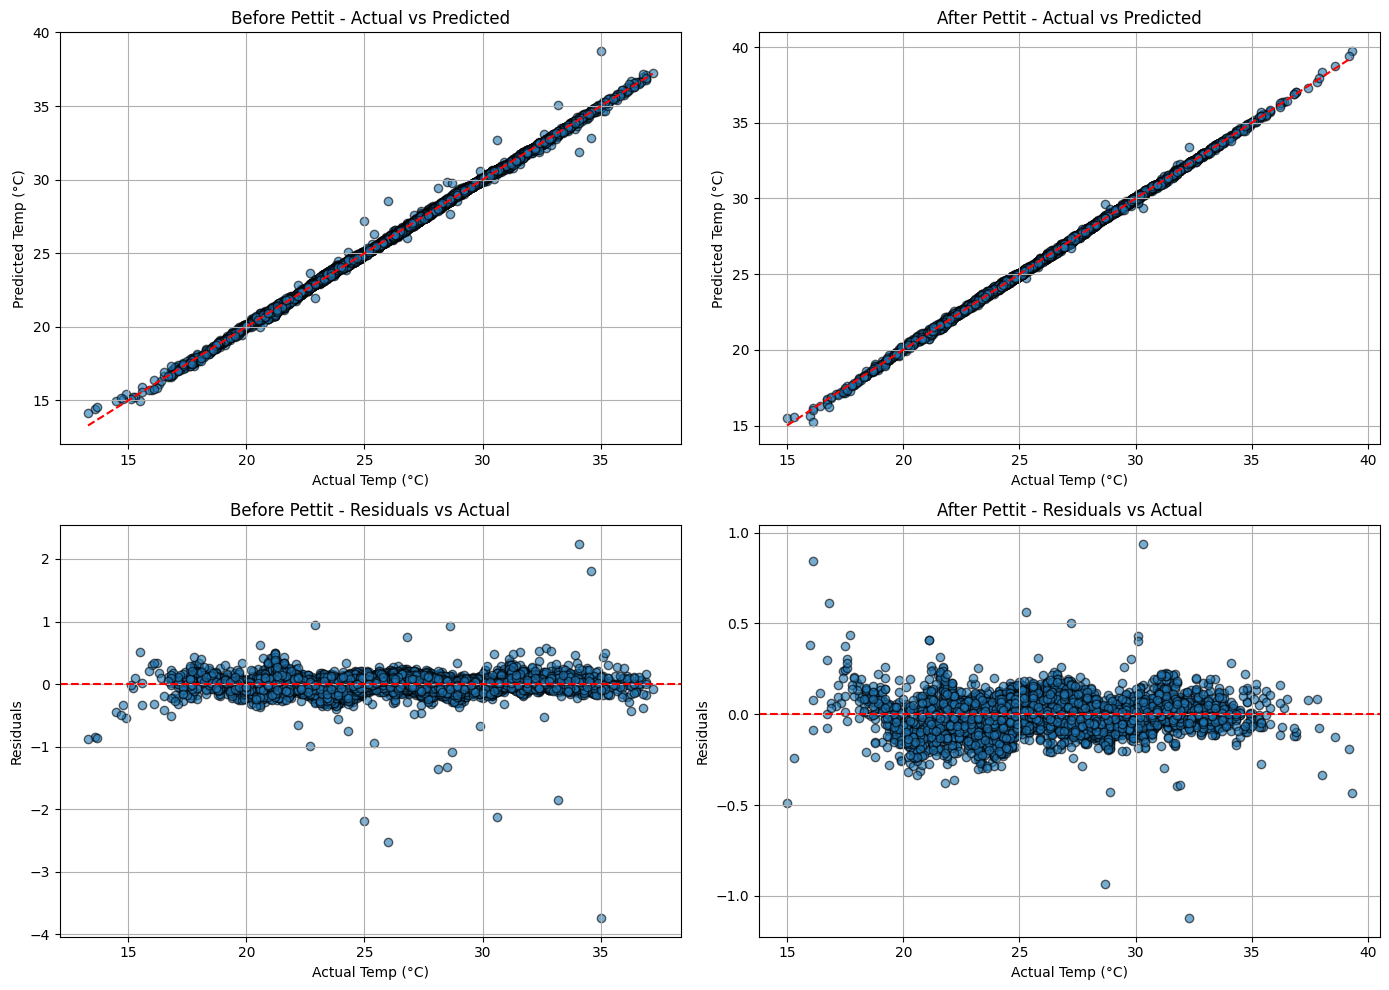

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ---- Final Model (degree 4) ----
final_model = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree=4, include_bias=False)),
    ("linreg", LinearRegression())
])

# Fit & predict Before Pettit
final_model.fit(X_train_before, y_train_before)
y_pred_before = final_model.predict(X_test_before)
residuals_before = y_test_before - y_pred_before

# Fit & predict After Pettit
final_model.fit(X_train_after, y_train_after)
y_pred_after = final_model.predict(X_test_after)
residuals_after = y_test_after - y_pred_after

# ---- Evaluation ----
def evaluate(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return rmse, mae, r2

rmse_before, mae_before, r2_before = evaluate(y_test_before, y_pred_before)
rmse_after, mae_after, r2_after = evaluate(y_test_after, y_pred_after)

print("=== Before Pettit ===")
print(f"R²: {r2_before:.4f}, RMSE: {rmse_before:.4f}, MAE: {mae_before:.4f}")
print("\n=== After Pettit ===")
print(f"R²: {r2_after:.4f}, RMSE: {rmse_after:.4f}, MAE: {mae_after:.4f}")

# ---- Visualizations 2x2 Grid ----
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1️⃣ Actual vs Predicted - Before
axes[0, 0].scatter(y_test_before, y_pred_before, alpha=0.6, edgecolor='k')
axes[0, 0].plot([y_test_before.min(), y_test_before.max()],
                 [y_test_before.min(), y_test_before.max()], 'r--')
axes[0, 0].set_title("Before Pettit - Actual vs Predicted")
axes[0, 0].set_xlabel("Actual Temp (°C)")
axes[0, 0].set_ylabel("Predicted Temp (°C)")
axes[0, 0].grid(True)

# 2️⃣ Actual vs Predicted - After
axes[0, 1].scatter(y_test_after, y_pred_after, alpha=0.6, edgecolor='k')
axes[0, 1].plot([y_test_after.min(), y_test_after.max()],
                 [y_test_after.min(), y_test_after.max()], 'r--')
axes[0, 1].set_title("After Pettit - Actual vs Predicted")
axes[0, 1].set_xlabel("Actual Temp (°C)")
axes[0, 1].set_ylabel("Predicted Temp (°C)")
axes[0, 1].grid(True)

# 3️⃣ Residuals vs Actual - Before
axes[1, 0].scatter(y_test_before, residuals_before, alpha=0.6, edgecolor='k')
axes[1, 0].axhline(0, color='r', linestyle='--')
axes[1, 0].set_title("Before Pettit - Residuals vs Actual")
axes[1, 0].set_xlabel("Actual Temp (°C)")
axes[1, 0].set_ylabel("Residuals")
axes[1, 0].grid(True)

# 4️⃣ Residuals vs Actual - After
axes[1, 1].scatter(y_test_after, residuals_after, alpha=0.6, edgecolor='k')
axes[1, 1].axhline(0, color='r', linestyle='--')
axes[1, 1].set_title("After Pettit - Residuals vs Actual")
axes[1, 1].set_xlabel("Actual Temp (°C)")
axes[1, 1].set_ylabel("Residuals")
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()


# Polynomial Regression Analysis Summary

## Executive Summary
This analysis evaluates polynomial regression models for temperature prediction using time series data split around a **Pettit change point**.  
Polynomial degrees 1–5 were tested with and without feature scaling.  
**Degree 4 with StandardScaler** consistently produced the best performance, with no overfitting detected.

---

## Methodology

### Model Configurations
- **Without Scaling:** PolynomialFeatures + LinearRegression  
- **With Scaling:** StandardScaler + PolynomialFeatures + LinearRegression (Pipeline)

### Overfitting Detection
- Compared Train vs Test R²  
- Threshold: |R²_Train – R²_Test| > 0.05 indicates potential overfitting  

---

## Results

### Overall Best Models
- **Before Pettit:** Degree 4 → R² = **0.9989**, RMSE = **0.1200**, MAE = **0.0807**  
- **After Pettit:** Degree 4 → R² = **0.9994**, RMSE = **0.0860**, MAE = **0.0621**  

### With Scaling (Comparison)
| Degree | R² Before | RMSE Before | R² After | RMSE After |
|--------|-----------|-------------|----------|------------|
| 1 | 0.9786 | 0.5201 | 0.9856 | 0.4198 |
| 2 | 0.9972 | 0.1867 | 0.9981 | 0.1526 |
| 3 | 0.9983 | 0.1454 | 0.9990 | 0.1120 |
| **4** | **0.9989** | **0.1200** | **0.9994** | **0.0860** |
| 5 | 0.9980 | 0.1584 | 0.9979 | 0.1600 |

✅ **Degree 4 is optimal** in both periods.

---

## Overfitting Check

### Before Pettit
| Degree | R²_Train | R²_Test | Difference | Overfitting |
|--------|----------|---------|------------|-------------|
| 1 | 0.9795 | 0.9786 | 0.00094 | ❌ No |
| 2 | 0.9975 | 0.9972 | 0.00025 | ❌ No |
| 3 | 0.9986 | 0.9983 | 0.00023 | ❌ No |
| **4** | 0.9991 | 0.9989 | 0.00027 | ❌ No |
| 5 | 0.9993 | 0.9980 | 0.00128 | ❌ No |

### After Pettit
| Degree | R²_Train | R²_Test | Difference | Overfitting |
|--------|----------|---------|------------|-------------|
| 1 | 0.9821 | 0.9856 | -0.0035 | ❌ No |
| 2 | 0.9980 | 0.9981 | -0.00007 | ❌ No |
| 3 | 0.9990 | 0.9990 | 0.00000 | ❌ No |
| **4** | 0.9995 | 0.9994 | 0.00007 | ❌ No |
| 5 | 0.9996 | 0.9979 | 0.00170 | ❌ No |

👉 No overfitting detected (Degree 4 remains most stable).  

---

## Visual Analysis
- **Actual vs Predicted:** Very close fit to the diagonal line, particularly After Pettit.  
- **Residuals vs Actual:** Random scatter around zero with smaller spread After Pettit → improved stability.  
- **Conclusion:** Polynomial regression (degree 4) significantly enhances predictive accuracy compared to linear models.

---

## Key Takeaways
1. **Degree 4 polynomial regression** is the best trade-off between accuracy and stability.  
2. **After Pettit models** perform better (lower RMSE, higher R², tighter residuals).  
3. No signs of overfitting across degrees 1–5.  
4. Scaling improves training stability and comparability across degrees.  


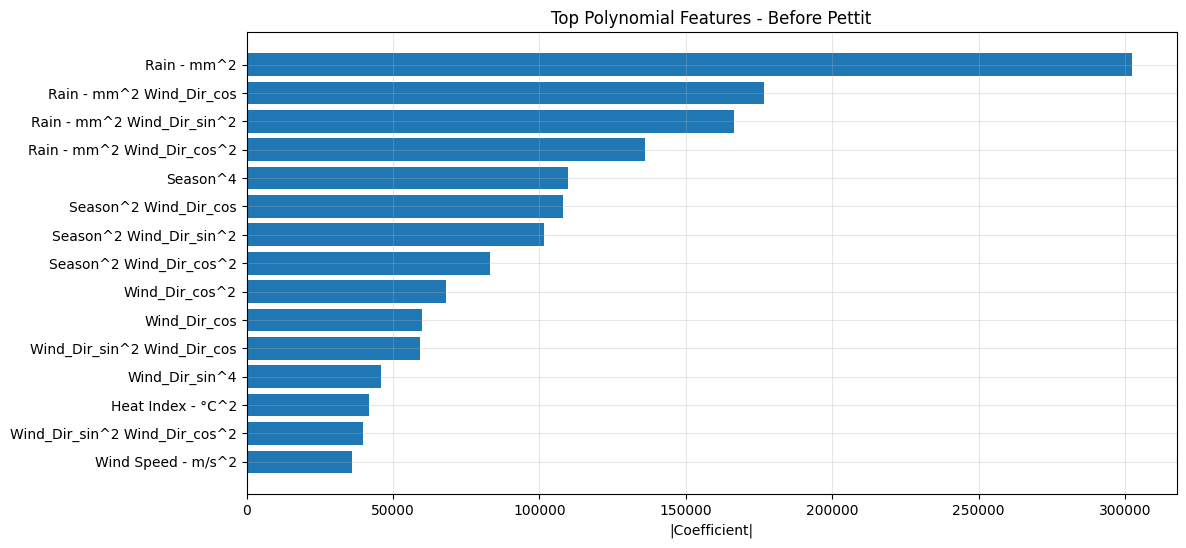

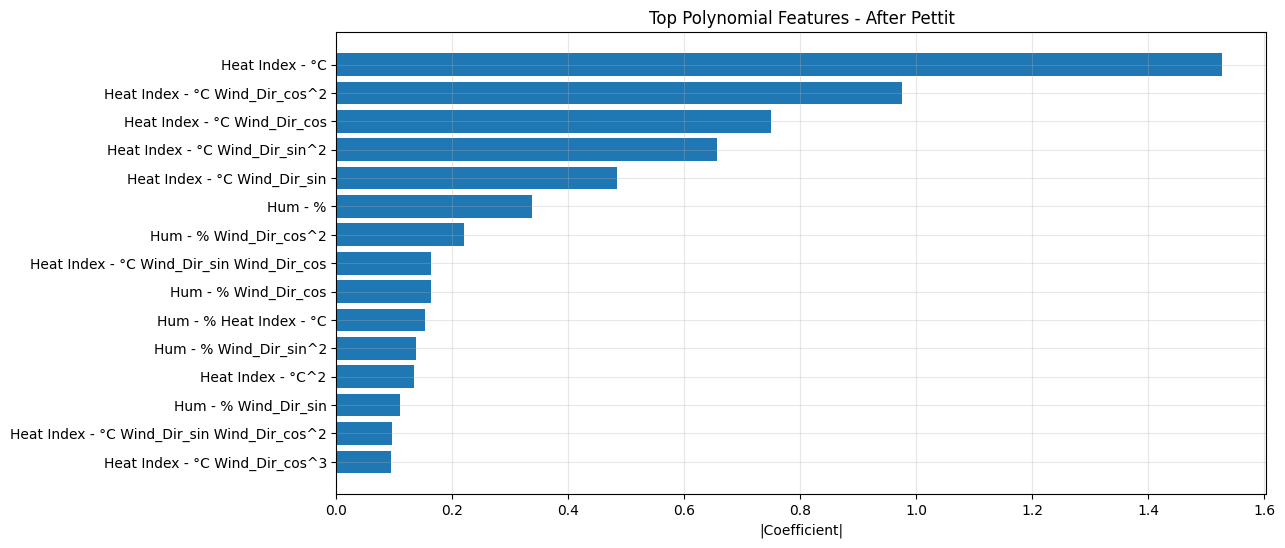


===== Top Features Increased in Importance After Pettit =====
                                               Feature  Importance_Before  \
219   Barometer - mm Hg Hum - % Heat Index - °C Season           0.009217   
339           Hum - % Rain - mm Heat Index - °C Season           0.008963   
82                                 Hum - %^2 Rain - mm           0.013980   
239  Barometer - mm Hg Wind Speed - m/s Heat Index ...           0.000231   
349                   Hum - % Heat Index - °C^2 Season           0.009739   

     Importance_After    Change  
219          0.050201  0.040984  
339          0.042435  0.033472  
82           0.044993  0.031013  
239          0.023835  0.023604  
349          0.033129  0.023390  

===== Top Features Decreased in Importance After Pettit =====
                        Feature  Importance_Before  Importance_After  \
479                    Season^4      109621.154576          0.000134   
438  Rain - mm^2 Wind_Dir_cos^2      136048.784404          0.0

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# ==== Final Polynomial Model (degree 4) ====
final_model = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree=4, include_bias=False)),
    ("linreg", LinearRegression())
])

def feature_importance_poly(model, X_train, y_train, feature_names, title="Feature Importance"):
    """
    Compute and visualize feature importance for a polynomial regression pipeline
    """
    model.fit(X_train, y_train)
    
    # Get polynomial feature names
    poly_feature_names = model.named_steps['poly'].get_feature_names_out(feature_names)
    coefficients = model.named_steps['linreg'].coef_
    
    # Create DataFrame
    importance_df = pd.DataFrame({
        'Feature': poly_feature_names,
        'Coefficient': coefficients,
        'Abs_Coefficient': np.abs(coefficients)
    }).sort_values('Abs_Coefficient', ascending=False)
    
    # Plot top 15 features
    plt.figure(figsize=(12,6))
    plt.barh(importance_df['Feature'][:15][::-1], importance_df['Abs_Coefficient'][:15][::-1])
    plt.xlabel('|Coefficient|')
    plt.title(title)
    plt.grid(alpha=0.3)
    plt.show()
    
    return importance_df

# ==== Run for Before Pettit ====
importance_before = feature_importance_poly(
    final_model, X_train_before, y_train_before, X_train_before.columns,
    title="Top Polynomial Features - Before Pettit"
)

# ==== Run for After Pettit ====
importance_after = feature_importance_poly(
    final_model, X_train_after, y_train_after, X_train_after.columns,
    title="Top Polynomial Features - After Pettit"
)

# ==== Comparison ====
comparison_df = pd.DataFrame({
    'Feature': importance_before['Feature'],
    'Importance_Before': importance_before['Abs_Coefficient'],
    'Importance_After': importance_after['Abs_Coefficient']
})

comparison_df['Change'] = comparison_df['Importance_After'] - comparison_df['Importance_Before']
comparison_df = comparison_df.sort_values('Change', ascending=False)

print("\n===== Top Features Increased in Importance After Pettit =====")
print(comparison_df.head(5))

print("\n===== Top Features Decreased in Importance After Pettit =====")
print(comparison_df.tail(5))


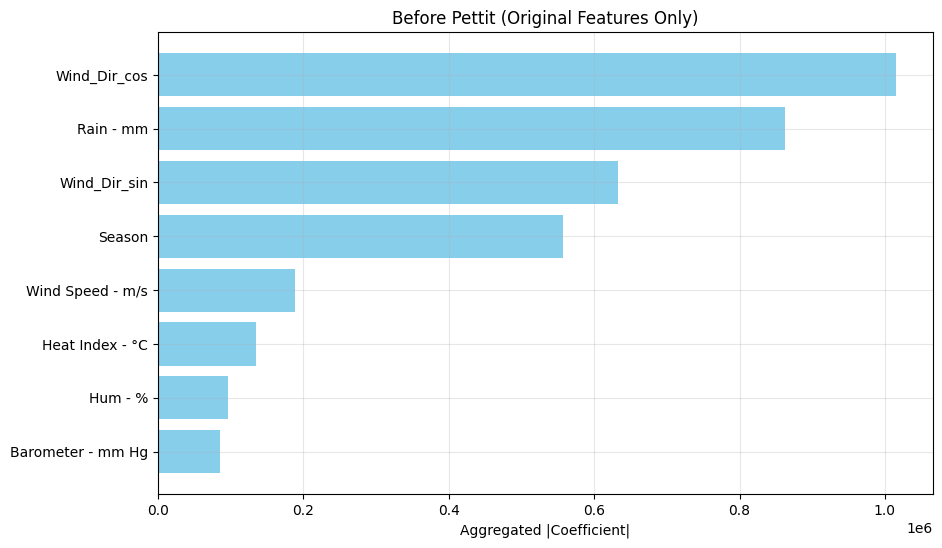

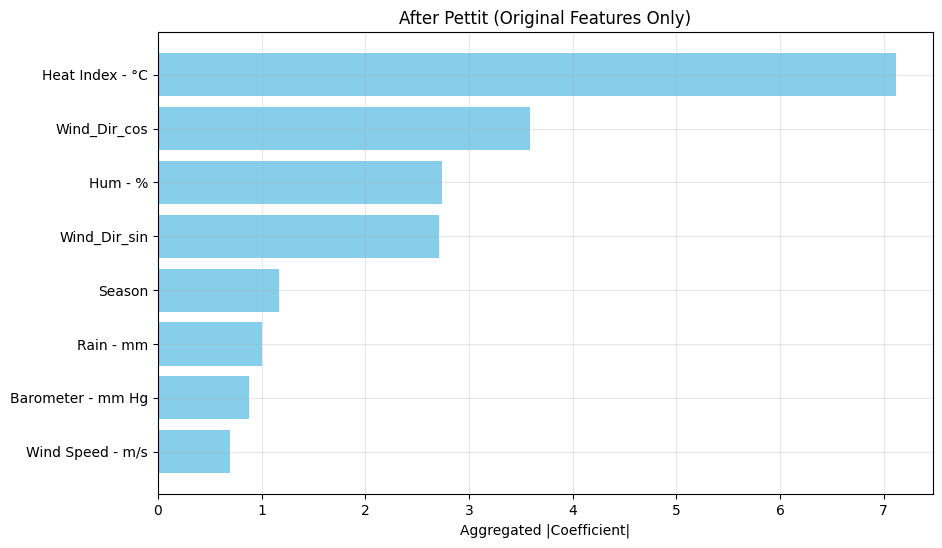

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def polynomial_feature_importance(X, y, degree=4, title="Polynomial Feature Importance"):
    """
    Feature importance for polynomial regression, keeping original features only.
    """
    # Pipeline
    model = Pipeline([
        ("scaler", StandardScaler()),
        ("poly", PolynomialFeatures(degree=degree, include_bias=False)),
        ("linreg", LinearRegression())
    ])
    
    model.fit(X, y)
    
    # Extract coefficients
    coefficients = model.named_steps['linreg'].coef_
    
    # Sum absolute values of coefficients that contain the original feature
    feature_names = X.columns.tolist()
    importance = {}
    for i, fname in enumerate(feature_names):
        # كل coefficient مرتبط بالـ feature الاصلي fname في التركيبات
        # نجمع القيم المطلقة لكل term يحتوي fname
        coef_indices = [j for j, term in enumerate(model.named_steps['poly'].get_feature_names_out(X.columns)) if fname in term]
        importance[fname] = np.sum(np.abs(coefficients[coef_indices]))
    
    # DataFrame
    importance_df = pd.DataFrame({
        'Feature': list(importance.keys()),
        'Importance': list(importance.values())
    }).sort_values('Importance', ascending=False)
    
    # Visualization
    plt.figure(figsize=(10,6))
    plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
    plt.xlabel("Aggregated |Coefficient|")
    plt.title(f"{title} (Original Features Only)")
    plt.gca().invert_yaxis()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return importance_df

# --- Run for Before Pettit ---
importance_before = polynomial_feature_importance(X_train_before, y_train_before, degree=4, title="Before Pettit")

# --- Run for After Pettit ---
importance_after = polynomial_feature_importance(X_train_after, y_train_after, degree=4, title="After Pettit")


# 🌦️ Climate Regime Shift: Before vs After Pettit

## 🌧️ Before Pettit — Rainfall-Driven System

* ✅ **Rainfall dominated** → Rain² strongest predictor
* 🌬️ Strong **Rain × Wind Direction** & seasonal interactions
* 📉 **Heat Index moderate** but not main driver
* 🌦️ **Weather:** wetter, variable, precipitation-regulated, strong seasonal cycles

## ☀️ After Pettit — Heat-Driven System

* ✅ **Heat Index dominated** → clear primary driver
* 💨 Important: **Heat Index × Wind Direction**, **Humidity**
* 🌧️ Rainfall importance dropped sharply
* 📉 Seasonal effects weakened → simpler relationships
* 🌡️ **Weather:** hotter, more stable, humidity-driven, weaker rainfall influence

---

## 🔑 Key Insights

* 📌 **Shift detected:** Rainfall-driven → Heat-driven system
* 📊 **Predictability improved:** simpler, more linear, less error-prone after Pettit
* 🌍 **Climate signal:** Suggests long-term warming trend, reduced rainfall control

